Đọc các file Excel trong bộ dữ liệu

In [1]:
import pandas as pd
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,  root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [2]:
folder_path = "Data"
print(f"Đang đọc các file Excel trong thư mục: {folder_path}\n")

Đang đọc các file Excel trong thư mục: Data



Loại bỏ các giá trị Null trong các tập dữ liệu

In [3]:
# Đọc file và kiểm tra dữ liệu
for file_name in os.listdir(folder_path):
    if file_name.endswith(('.xlsx', '.xls')):
        file_path = os.path.join(folder_path, file_name)
        
        try:
            # Đọc file Excel
            data = pd.read_excel(file_path)
            
            # Lấy số hàng và số cột
            num_rows = data.shape[0]
            
            print(f"File: {file_name}")
            print(f"Kích thước: {num_rows} hàng")

            # Null checking
            null_counts = data.isnull().sum()
            
            # Hiển thị các cột có giá trị null
            if null_counts.sum() > 0:
                print("Số giá trị null theo cột:")
                print(null_counts[null_counts > 0])  # Chỉ hiển thị cột có null
                print(f"\nTổng số giá trị null: {null_counts.sum()}")
            else:
                print("Không có giá trị null nào trong file này")
            
            print("-" * 50)

        except Exception as e:
            print(f"Lỗi khi đọc file {file_name}: {e}")

File: SHGC-0.1_Tvis-0.9_Uval-0.05_modified.xlsx
Kích thước: 779 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-1.00_modified.xlsx
Kích thước: 776 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-2.00_modified.xlsx
Kích thước: 776 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-3.00_modified.xlsx
Kích thước: 776 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-4.00_modified.xlsx
Kích thước: 776 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-5.00_modified.xlsx
Kích thước: 776 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-6.00_

Gộp tất cả các file lại vào một DataFrame

In [4]:
# Tạo DataFrame cho train và test
df = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith(('.xlsx', '.xls')):
        file_path = os.path.join(folder_path, file_name)
        
        try:
            # Đọc file Excel
            data = pd.read_excel(file_path)

            
            # Cộng dồn vào biến tổng
            df = pd.concat([df, data], ignore_index=True)
            
            print(f"Đã xử lý: {file_name} ({len(data)} dòng)")
            
        except Exception as e:
            print(f"Lỗi khi xử lý {file_name}: {str(e)}")

# Kết quả cuối cùng
print("\nKết quả tổng hợp:")
print(f"Tổng df: {len(df)} dòng")

Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-0.05_modified.xlsx (779 dòng)
Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-1.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-2.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-3.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-4.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-5.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-6.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-0.05_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-1.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-2.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-3.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-4.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-5.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.3_Tvis-0.9_Uval-6.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.5_Tvis-0.9_Uval-0.05_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.5_Tvis-0.9_Uval-1.00_modified.xlsx (77

In [5]:
df

,in:SHGC,in:U-val,out:P1_l,out:P1_r,out:P1_x,out:P1_y,out:P2_l,out:P2_r,out:P2_x,out:P2_y,...,out:S2_xi,out:S2_yi,out:S3_d1,out:S3_d2,out:S3_d3,out:S3_d4,out:S3_xi,out:S3_yi,out:Total-CoolingLoad (J),out:Total_HEAT-LOSS(J)
0,0.1,0.05,20.000000,0.5 * Pi,40.000000,10.000000,20.0,0.5 * Pi,60.000000,10.000000,...,30.000000,0.000000,14.142136,14.142136,14.142136,14.142136,50.000000,0.000000,1882600000000,125510000000
1,0.1,0.05,22.679492,0.5 * Pi,37.320508,20.000000,20.0,0.5 * Pi,57.320508,20.000000,...,27.260677,10.446582,14.142136,14.142136,14.142136,14.142136,47.320508,10.000000,1848600000000,128940000000
2,0.1,0.05,25.773503,0.5 * Pi,30.000000,27.320508,20.0,0.5 * Pi,50.000000,27.320508,...,19.722222,18.282759,14.142136,14.142136,14.142136,14.142136,40.000000,17.320508,1794900000000,133580000000
3,0.1,0.05,30.000000,0.5 * Pi,20.000000,30.000000,20.0,0.5 * Pi,40.000000,30.000000,...,9.166667,21.666667,14.142136,14.142136,14.142136,14.142136,30.000000,20.000000,1807000000000,132440000000
4,0.1,0.05,37.320508,0.5 * Pi,10.000000,27.320508,20.0,0.5 * Pi,30.000000,27.320508,...,-2.500000,20.207259,14.142136,14.142136,14.142136,14.142136,20.000000,17.320508,1846900000000,130010000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16294,0.5,6.00,2.679492,2.094395,5.000000,-11.339746,20.0,2.094395,22.320508,-21.339746,...,-12.268693,-16.250000,14.142136,14.142136,14.142136,14.142136,8.660254,-25.000000,5730600000000,1283300000000
16295,0.5,6.00,10.000000,2.094395,12.320508,-18.660254,20.0,2.094395,29.641016,-28.660254,...,-2.894767,-23.347217,14.142136,14.142136,14.142136,14.142136,15.980762,-32.320508,5806400000000,1283800000000
16296,0.5,6.00,14.226497,2.094395,22.320508,-21.339746,20.0,2.094395,39.641016,-31.339746,...,7.938566,-25.694444,14.142136,14.142136,14.142136,14.142136,25.980762,-35.000000,5870200000000,1292100000000
16297,0.5,6.00,17.320508,2.094395,32.320508,-18.660254,20.0,2.094395,49.641016,-28.660254,...,18.385148,-22.677344,14.142136,14.142136,14.142136,14.142136,35.980762,-32.320508,5861600000000,1295700000000


Chuyển giá trị Pi về số thực

In [6]:
# Chuyển tất cả các giá trị chứa "Pi" thành số thực
# ---------------------------------
def replace_pi_with_float(df):
    df = df.copy()

    # Thay thế 'Pi' thành giá trị số thực
    df = df.replace({'Pi': math.pi})

    # Thay thế các biểu thức dạng 'a * Pi' thành số thực
    for col in df.columns:
        # Duyệt qua từng ô và xử lý
        df[col] = df[col].apply(lambda x: eval(str(x).replace('Pi', 'math.pi')) if isinstance(x, str) else x)

    # Xử lý các giá trị NaN sau khi chuyển đổi
    df = df.fillna(0)  # Thay thế NaN bằng 0
    # Hoặc loại bỏ các hàng có NaN
    # df = df.dropna()  # Bỏ các hàng chứa NaN

    return df

In [7]:
# Áp dụng cho cả train và test
print ("Dữ liệu trước khi chuyển đổi giá trị 'PI':")
df.head()

Dữ liệu trước khi chuyển đổi giá trị 'PI':


,in:SHGC,in:U-val,out:P1_l,out:P1_r,out:P1_x,out:P1_y,out:P2_l,out:P2_r,out:P2_x,out:P2_y,...,out:S2_xi,out:S2_yi,out:S3_d1,out:S3_d2,out:S3_d3,out:S3_d4,out:S3_xi,out:S3_yi,out:Total-CoolingLoad (J),out:Total_HEAT-LOSS(J)
0,0.1,0.05,20.000000,0.5 * Pi,40.000000,10.000000,20.0,0.5 * Pi,60.000000,10.000000,...,30.000000,0.000000,14.142136,14.142136,14.142136,14.142136,50.000000,0.000000,1882600000000,125510000000
1,0.1,0.05,22.679492,0.5 * Pi,37.320508,20.000000,20.0,0.5 * Pi,57.320508,20.000000,...,27.260677,10.446582,14.142136,14.142136,14.142136,14.142136,47.320508,10.000000,1848600000000,128940000000
2,0.1,0.05,25.773503,0.5 * Pi,30.000000,27.320508,20.0,0.5 * Pi,50.000000,27.320508,...,19.722222,18.282759,14.142136,14.142136,14.142136,14.142136,40.000000,17.320508,1794900000000,133580000000
3,0.1,0.05,30.000000,0.5 * Pi,20.000000,30.000000,20.0,0.5 * Pi,40.000000,30.000000,...,9.166667,21.666667,14.142136,14.142136,14.142136,14.142136,30.000000,20.000000,1807000000000,132440000000
4,0.1,0.05,37.320508,0.5 * Pi,10.000000,27.320508,20.0,0.5 * Pi,30.000000,27.320508,...,-2.500000,20.207259,14.142136,14.142136,14.142136,14.142136,20.000000,17.320508,1846900000000,130010000000


In [8]:
# In kết quả sau khi chuyển đổi
df = replace_pi_with_float(df)
print("Dữ liệu sau khi chuyển đổi giá trị 'Pi':")
df.head()

Dữ liệu sau khi chuyển đổi giá trị 'Pi':


,in:SHGC,in:U-val,out:P1_l,out:P1_r,out:P1_x,out:P1_y,out:P2_l,out:P2_r,out:P2_x,out:P2_y,...,out:S2_xi,out:S2_yi,out:S3_d1,out:S3_d2,out:S3_d3,out:S3_d4,out:S3_xi,out:S3_yi,out:Total-CoolingLoad (J),out:Total_HEAT-LOSS(J)
0,0.1,0.05,20.000000,1.570796,40.000000,10.000000,20.0,1.570796,60.000000,10.000000,...,30.000000,0.000000,14.142136,14.142136,14.142136,14.142136,50.000000,0.000000,1882600000000,125510000000
1,0.1,0.05,22.679492,1.570796,37.320508,20.000000,20.0,1.570796,57.320508,20.000000,...,27.260677,10.446582,14.142136,14.142136,14.142136,14.142136,47.320508,10.000000,1848600000000,128940000000
2,0.1,0.05,25.773503,1.570796,30.000000,27.320508,20.0,1.570796,50.000000,27.320508,...,19.722222,18.282759,14.142136,14.142136,14.142136,14.142136,40.000000,17.320508,1794900000000,133580000000
3,0.1,0.05,30.000000,1.570796,20.000000,30.000000,20.0,1.570796,40.000000,30.000000,...,9.166667,21.666667,14.142136,14.142136,14.142136,14.142136,30.000000,20.000000,1807000000000,132440000000
4,0.1,0.05,37.320508,1.570796,10.000000,27.320508,20.0,1.570796,30.000000,27.320508,...,-2.500000,20.207259,14.142136,14.142136,14.142136,14.142136,20.000000,17.320508,1846900000000,130010000000


In [9]:
# Khởi tạo scaler
scaler = MinMaxScaler()

# Scale dữ liệu trong df
scaled_df_standard = scaler.fit_transform(df)

# Chuyển đổi kết quả về DataFrame
scaled_df_standard = pd.DataFrame(scaled_df_standard, columns=df.columns)

# Kiểm tra kết quả
print(scaled_df_standard.head())


   in:SHGC  in:U-val  out:P1_l  out:P1_r  out:P1_x  out:P1_y  out:P2_l  \
0      0.0       0.0  0.500000       0.5  0.848915  0.587229       0.5   
1      0.0       0.0  0.577350       0.5  0.825542  0.674458       0.5   
2      0.0       0.0  0.666667       0.5  0.761686  0.738314       0.5   
3      0.0       0.0  0.788675       0.5  0.674458  0.761686       0.5   
4      0.0       0.0  1.000000       0.5  0.587229  0.738314       0.5   

   out:P2_r  out:P2_x  out:P2_y  ...  out:S2_xi  out:S2_yi  out:S3_d1  \
0       0.5  0.981382  0.580230  ...   0.961538   0.500000   0.175776   
1       0.5  0.959885  0.660461  ...   0.919395   0.660717   0.175776   
2       0.5  0.901152  0.719194  ...   0.803419   0.781273   0.175776   
3       0.5  0.820922  0.740691  ...   0.641026   0.833333   0.175776   
4       0.5  0.740691  0.719194  ...   0.461538   0.810881   0.175776   

   out:S3_d2  out:S3_d3  out:S3_d4  out:S3_xi  out:S3_yi  \
0   0.175776    0.11071    0.11071   1.000000   0.500000

Check Datatype của dữ liệu

In [10]:
scaled_df_standard.dtypes

in:SHGC                      float64
in:U-val                     float64
out:P1_l                     float64
out:P1_r                     float64
out:P1_x                     float64
out:P1_y                     float64
out:P2_l                     float64
out:P2_r                     float64
out:P2_x                     float64
out:P2_y                     float64
out:P3_l                     float64
out:P3_r                     float64
out:P3_x                     float64
out:P3_y                     float64
out:P4_l                     float64
out:P4_r                     float64
out:P4_x                     float64
out:P4_y                     float64
out:P5_l                     float64
out:P5_r                     float64
out:P5_x                     float64
out:P5_y                     float64
out:P6_l                     float64
out:P6_r                     float64
out:P6_x                     float64
out:P6_y                     float64
out:P7_l                     float64
o

Thống ke mô tả dữ liệu

In [11]:
stats = scaled_df_standard.describe()
stats

,in:SHGC,in:U-val,out:P1_l,out:P1_r,out:P1_x,out:P1_y,out:P2_l,out:P2_r,out:P2_x,out:P2_y,...,out:S2_xi,out:S2_yi,out:S3_d1,out:S3_d2,out:S3_d3,out:S3_d4,out:S3_xi,out:S3_yi,out:Total-CoolingLoad (J),out:Total_HEAT-LOSS(J)
count,16299.000000,16299.000000,16299.000000,16299.000000,16299.000000,16299.000000,16299.000000,16299.000000,16299.000000,16299.000000,...,16299.000000,16299.000000,16299.000000,16299.000000,16299.000000,16299.000000,16299.000000,16299.000000,16299.000000,16299.000000
mean,0.499908,0.496907,0.499275,0.499632,0.500332,0.500351,0.499245,0.499785,0.500363,0.500316,...,0.500463,0.500378,0.298070,0.296178,0.232171,0.230770,0.500434,0.500333,0.446064,0.545487
std,0.408280,0.334389,0.276391,0.296762,0.221275,0.222076,0.254739,0.296064,0.265947,0.265379,...,0.288055,0.288213,0.287484,0.287743,0.273120,0.273284,0.279056,0.278574,0.269770,0.253068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.159664,0.288675,0.166667,0.316987,0.316987,0.333333,0.333333,0.262189,0.262189,...,0.218727,0.218727,0.075538,0.075538,0.047975,0.047975,0.240192,0.240192,0.160212,0.441057
50%,0.500000,0.495798,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.294763,0.294763,0.166732,0.166732,0.500000,0.500000,0.452859,0.590573
75%,1.000000,0.831933,0.711325,0.666667,0.683013,0.686144,0.666667,0.666667,0.737811,0.737811,...,0.782051,0.782051,0.443748,0.443748,0.317132,0.317132,0.759808,0.759808,0.705728,0.735565
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Khởi tạo normalizer với norm='l2'
l2_normalizer = Normalizer(norm='l2')

# Chuẩn hóa từng hàng trong df
df_normalized = l2_normalizer.fit_transform(scaled_df_standard)

# Chuyển kết quả về DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

# Kiểm tra
print(df_normalized.head())


   in:SHGC  in:U-val  out:P1_l  out:P1_r  out:P1_x  out:P1_y  out:P2_l  \
0      0.0       0.0  0.126825  0.126825  0.215328  0.148951  0.126825   
1      0.0       0.0  0.142388  0.123311  0.203597  0.166336  0.123311   
2      0.0       0.0  0.162464  0.121848  0.185620  0.179925  0.121848   
3      0.0       0.0  0.191058  0.121126  0.163389  0.184520  0.121126   
4      0.0       0.0  0.235299  0.117650  0.138175  0.173725  0.117650   

   out:P2_r  out:P2_x  out:P2_y  ...  out:S2_xi  out:S2_yi  out:S3_d1  \
0  0.126825  0.248928  0.147176  ...   0.243894   0.126825   0.044586   
1  0.123311  0.236729  0.162885  ...   0.226744   0.162948   0.043350   
2  0.121848  0.219608  0.175265  ...   0.195791   0.190394   0.042836   
3  0.121126  0.198870  0.179434  ...   0.155290   0.201876   0.042582   
4  0.117650  0.174284  0.169226  ...   0.108600   0.190800   0.041360   

   out:S3_d2  out:S3_d3  out:S3_d4  out:S3_xi  out:S3_yi  \
0   0.044586   0.028082   0.028082   0.253650   0.126825

Ma trận tương quan giữa 2 biến đầu và 2 biến cuối:
                            in:SHGC  in:U-val  out:Total-CoolingLoad (J)  \
in:SHGC                    1.000000  0.000335                   0.978604   
in:U-val                   0.000335  1.000000                  -0.028804   
out:Total-CoolingLoad (J)  0.978604 -0.028804                   1.000000   
out:Total_HEAT-LOSS(J)     0.037415  0.904264                  -0.034760   

                           out:Total_HEAT-LOSS(J)  
in:SHGC                                  0.037415  
in:U-val                                 0.904264  
out:Total-CoolingLoad (J)               -0.034760  
out:Total_HEAT-LOSS(J)                   1.000000  


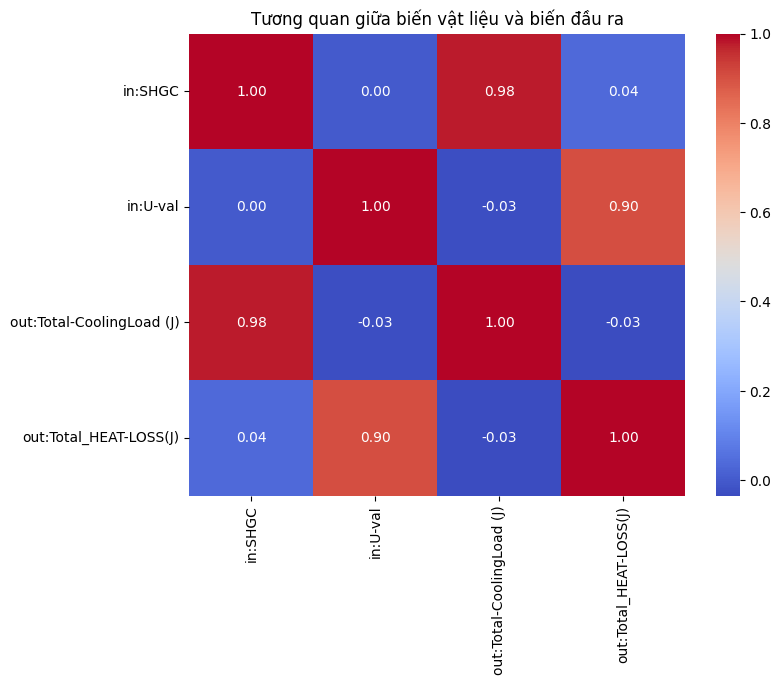

In [13]:
# Lấy tên 2 cột đầu tiên và 2 cột cuối cùng
material = df_normalized.iloc[:,:2]
out_put = df_normalized.iloc[:,-2:]

# Tạo tập con dữ liệu với 4 cột này
sub_df = df[list(material) + list(out_put)]

# Tính ma trận tương quan
correlation_matrix = sub_df.corr()

# Hiển thị ma trận tương quan
print("Ma trận tương quan giữa 2 biến đầu và 2 biến cuối:")
print(correlation_matrix)

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Tương quan giữa biến vật liệu và biến đầu ra')
plt.show()


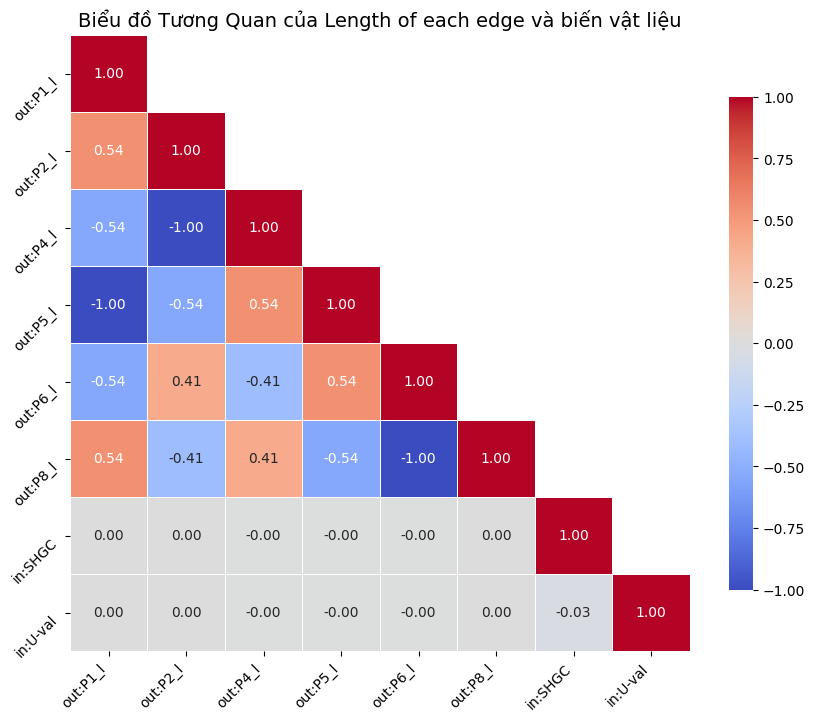

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Chỉ định các index biến chiều dài
index_l = [2, 6, 14, 18, 22, 30]
subset_df = scaled_df_standard.iloc[:, index_l]

# Lấy và chuẩn hóa 2 biến cuối (nếu chưa chuẩn hóa)
material = df_normalized.iloc[:,:2]
scaler = MinMaxScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material), 
                               columns=material.columns,
                               index=df.index)

# Gộp lại thành một DataFrame mới
combined_df = pd.concat([subset_df, scaled_material], axis=1)

# Tính toán ma trận tương quan
corr_matrix = combined_df.corr()

# Tạo mask tam giác trên (giữ lại đường chéo)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8}, mask=mask)

# Xoay nhãn trục
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Tiêu đề
plt.title("Biểu đồ Tương Quan của Length of each edge và biến vật liệu", fontsize=14)
plt.show()


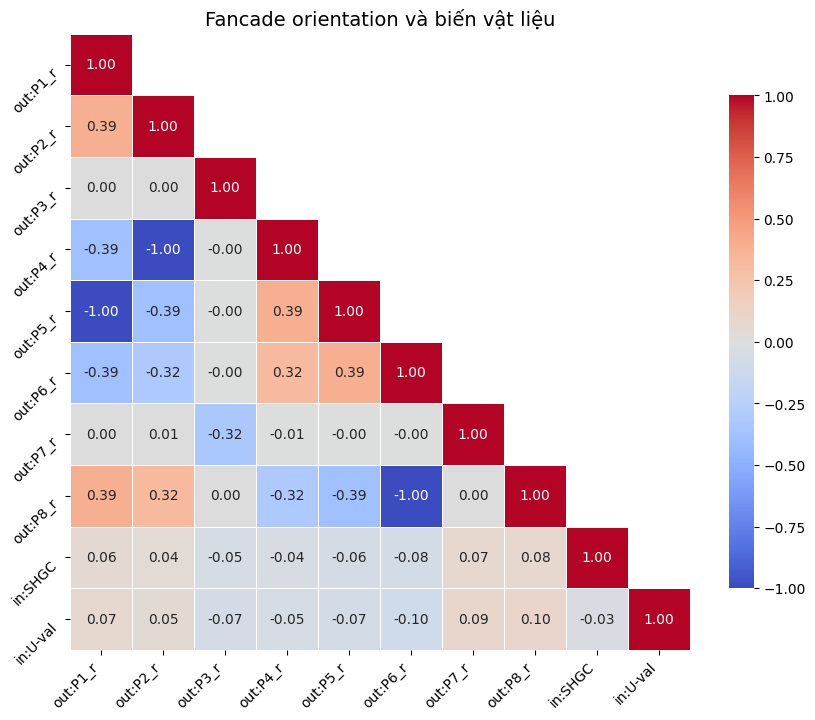

In [15]:
index_r = [3,7,11,15,19,23,27,31]  # Chỉ định các biến bạn muốn vẽ
# Lấy 8 biến tính từ biến thứ 3 (index 2 -> index 9)
subset_df = scaled_df_standard.iloc[:,index_r]

# Bước 2: Chuẩn hóa 2 biến cuối cùng từ df gốc
material = df_normalized.iloc[:,:2]
scaler = MinMaxScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Bước 3: Kết hợp lại
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Bước 4: Tính toán ma trận tương quan
corr_matrix = extended_subset_df.corr()

# Bước 5: Mask tam giác trên
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Bước 6: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8}, mask=mask)

# Bước 7: Định dạng trục
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Bước 8: Tiêu đề
plt.title("Fancade orientation và biến vật liệu", fontsize=14)
plt.show()



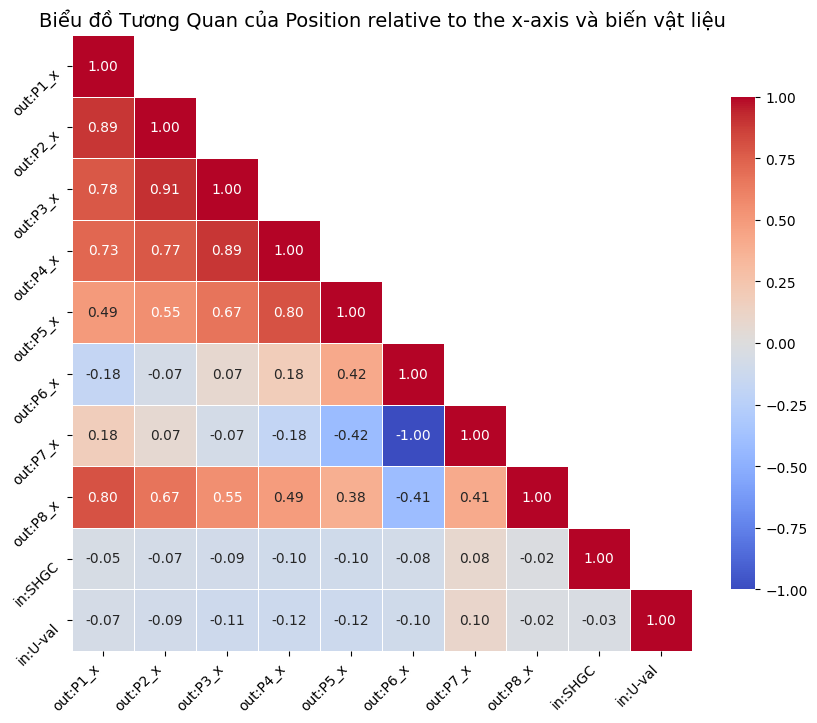

In [16]:
index_x   = [4,8,12,16,20,24,28,32]  # Chỉ định các biến bạn muốn vẽ
# Lấy 8 biến tính từ biến thứ 3 (index 2 -> index 9)
subset_df = scaled_df_standard.iloc[:, index_x]

# Bước 2: Chuẩn hóa 2 biến cuối cùng từ df gốc
material = df_normalized.iloc[:, :2]
scaler = MinMaxScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Bước 3: Kết hợp lại
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Bước 4: Tính toán ma trận tương quan
corr_matrix = extended_subset_df.corr()

# Bước 5: Mask tam giác trên
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Bước 6: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8}, mask=mask)

# Bước 7: Định dạng trục
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Bước 8: Tiêu đề
plt.title("Biểu đồ Tương Quan của Position relative to the x-axis và biến vật liệu", fontsize=14)
plt.show()



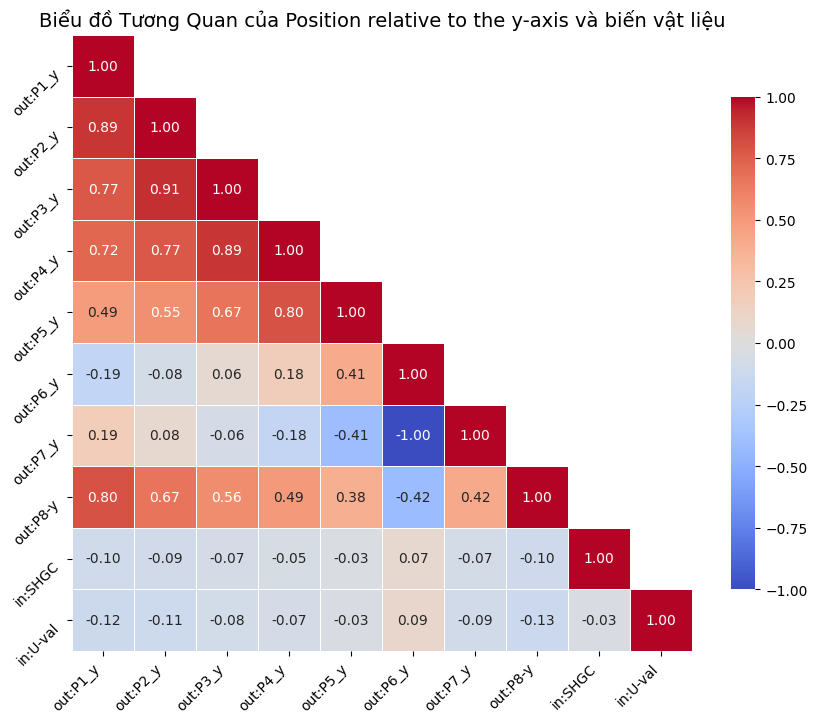

In [17]:
# Bước 1: Các biến gốc đã được chuẩn hóa
index_y = [5, 9, 13, 17, 21, 25, 29, 33]
subset_df = scaled_df_standard.iloc[:, index_y]

# Bước 2: Chuẩn hóa 2 biến cuối cùng từ df gốc
material = df_normalized.iloc[:, :2]
scaler = MinMaxScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Bước 3: Kết hợp lại
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Bước 4: Tính toán ma trận tương quan
corr_matrix = extended_subset_df.corr()

# Bước 5: Mask tam giác trên
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Bước 6: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8}, mask=mask)

# Bước 7: Định dạng trục
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Bước 8: Tiêu đề
plt.title("Biểu đồ Tương Quan của Position relative to the y-axis và biến vật liệu", fontsize=14)
plt.show()


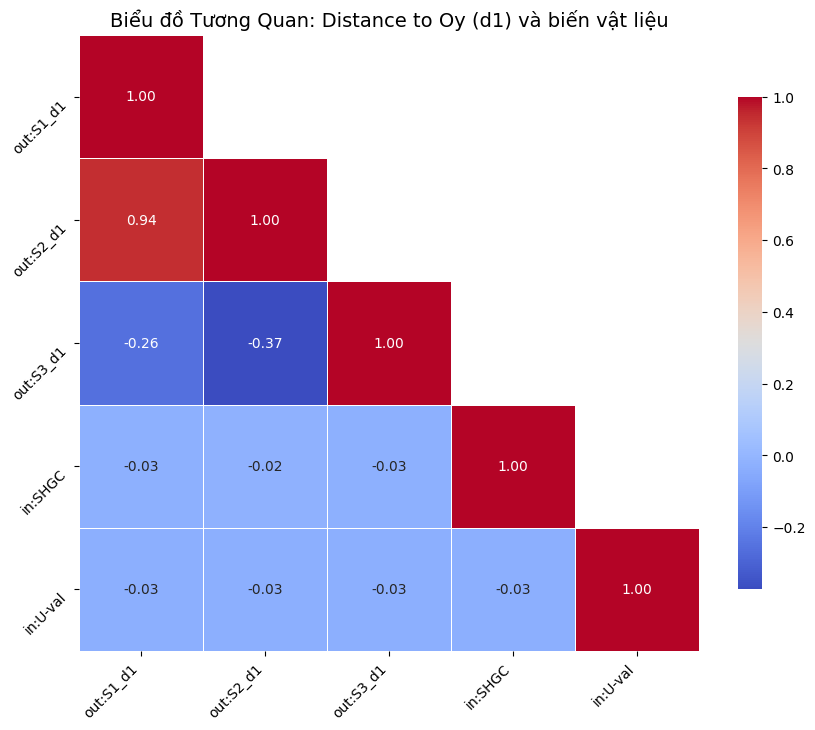

In [18]:
# Bước 1: Lấy 3 biến từ nhóm index_d2
index_d1 = [34, 40, 46]
subset_df = scaled_df_standard.iloc[:, index_d1]

# Bước 2: Chuẩn hóa 2 biến cuối từ df gốc
material = df_normalized.iloc[:, :2]
scaler = MinMaxScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Bước 3: Kết hợp lại với 3 biến ban đầu
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Bước 4: Tính ma trận tương quan
corr_matrix_extended = extended_subset_df.corr()

# Bước 5: Tạo mask tam giác trên
mask = np.triu(np.ones_like(corr_matrix_extended, dtype=bool), k=1)

# Bước 6: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_extended, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8}, mask=mask)

# Bước 7: Định dạng trục
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Bước 8: Tiêu đề
plt.title("Biểu đồ Tương Quan: Distance to Oy (d1) và biến vật liệu", fontsize=14)
plt.show()


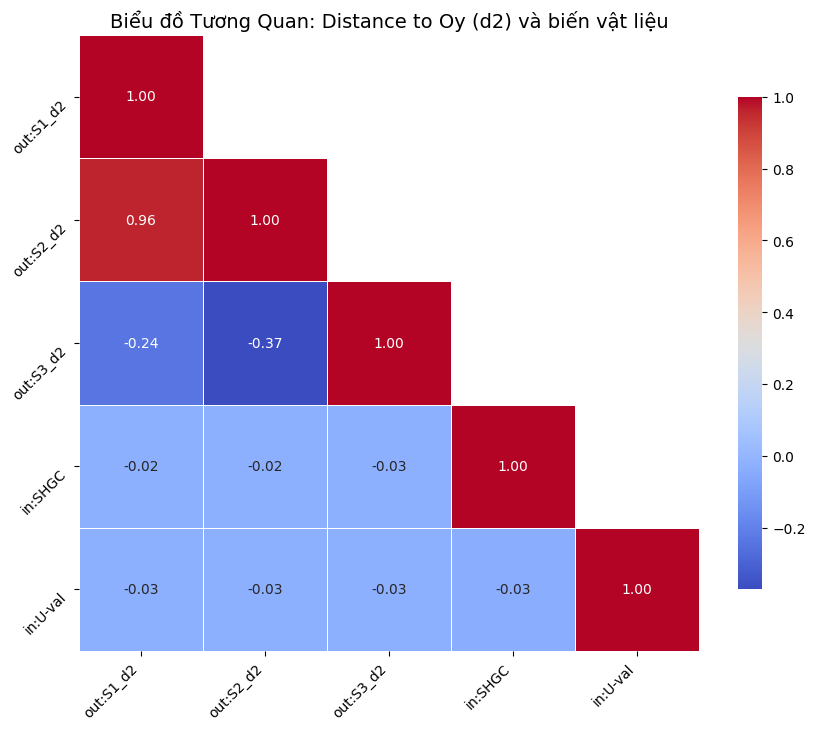

In [19]:
# Bước 1: Lấy 3 biến từ nhóm index_d2
index_d2 = [35, 41, 47]
subset_df = scaled_df_standard.iloc[:, index_d2]

# Bước 2: Chuẩn hóa 2 biến cuối từ df gốc
material = df_normalized.iloc[:, :2]
scaler = MinMaxScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Bước 3: Kết hợp lại với 3 biến ban đầu
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Bước 4: Tính ma trận tương quan
corr_matrix_extended = extended_subset_df.corr()

# Bước 5: Tạo mask tam giác trên
mask = np.triu(np.ones_like(corr_matrix_extended, dtype=bool), k=1)

# Bước 6: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_extended, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8}, mask=mask)

# Bước 7: Định dạng trục
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Bước 8: Tiêu đề
plt.title("Biểu đồ Tương Quan: Distance to Oy (d2) và biến vật liệu", fontsize=14)
plt.show()


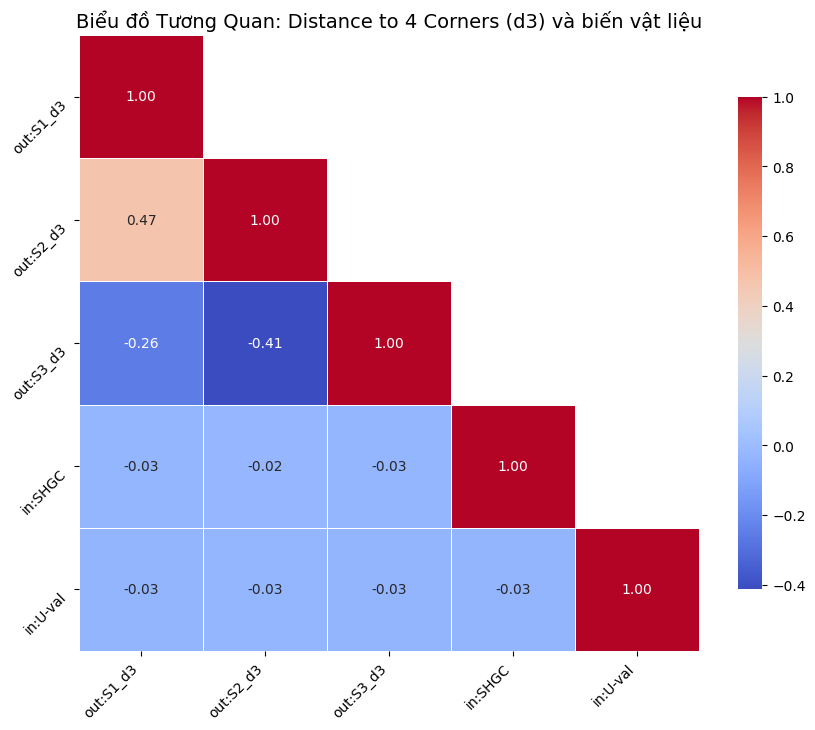

In [20]:
# Bước 1: Chọn 3 biến theo index_d3 từ scaled_df_standard
index_d3 = [36, 42, 48]
subset_df = scaled_df_standard.iloc[:, index_d3]

# Bước 2: Lấy 2 biến cuối từ df gốc
material = df_normalized.iloc[:, :2]

# Chuẩn hóa 2 biến cuối (để đồng bộ scale với scaled_df_standard)
scaler = MinMaxScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Bước 3: Kết hợp lại thành một DataFrame mở rộng
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Bước 4: Tính ma trận tương quan
corr_matrix_extended = extended_subset_df.corr()

# Bước 5: Tạo mask tam giác trên
mask = np.triu(np.ones_like(corr_matrix_extended, dtype=bool), k=1)

# Bước 6: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_extended, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8}, mask=mask)

# Bước 7: Định dạng nhãn
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Bước 8: Thêm tiêu đề
plt.title("Biểu đồ Tương Quan: Distance to 4 Corners (d3) và biến vật liệu", fontsize=14)
plt.show()


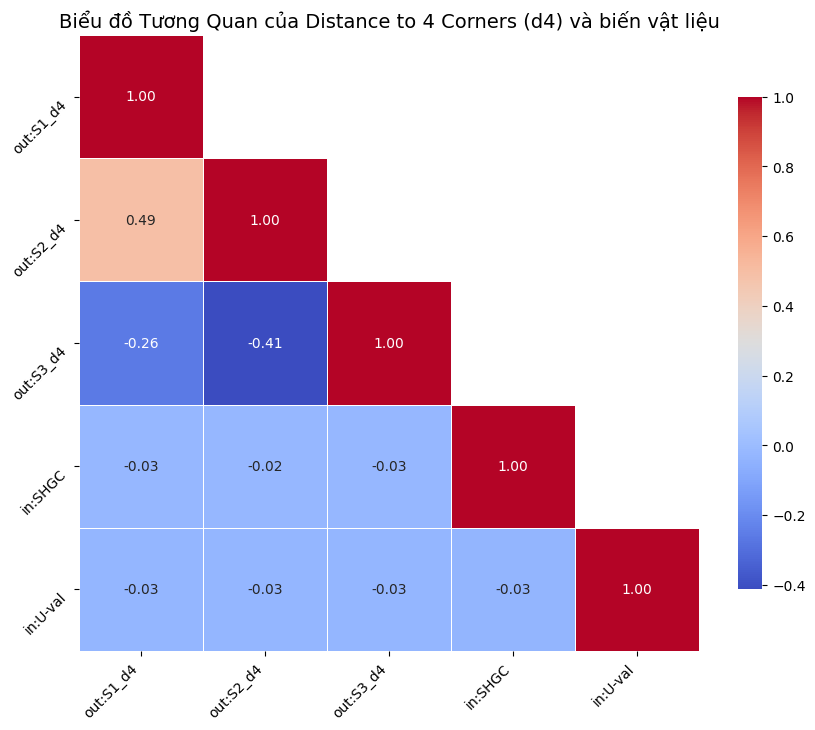

In [21]:
# Bước 1: Chọn các biến từ scaled_df_standard
index_d4 = [37, 43, 49]
subset_df = scaled_df_standard.iloc[:, index_d4]

# Bước 2: Lấy 2 biến cuối từ DataFrame gốc
material = df_normalized.iloc[:, :2]

# Chuẩn hóa 2 biến cuối
scaler = MinMaxScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Bước 3: Ghép lại thành một DataFrame mở rộng
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Bước 4: Tính toán ma trận tương quan
corr_matrix_extended = extended_subset_df.corr()

# Bước 5: Tạo mask tam giác trên
mask = np.triu(np.ones_like(corr_matrix_extended, dtype=bool), k=1)

# Bước 6: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_extended, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8}, mask=mask)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Bước 7: Tiêu đề
plt.title("Biểu đồ Tương Quan của Distance to 4 Corners (d4) và biến vật liệu", fontsize=14)
plt.show()


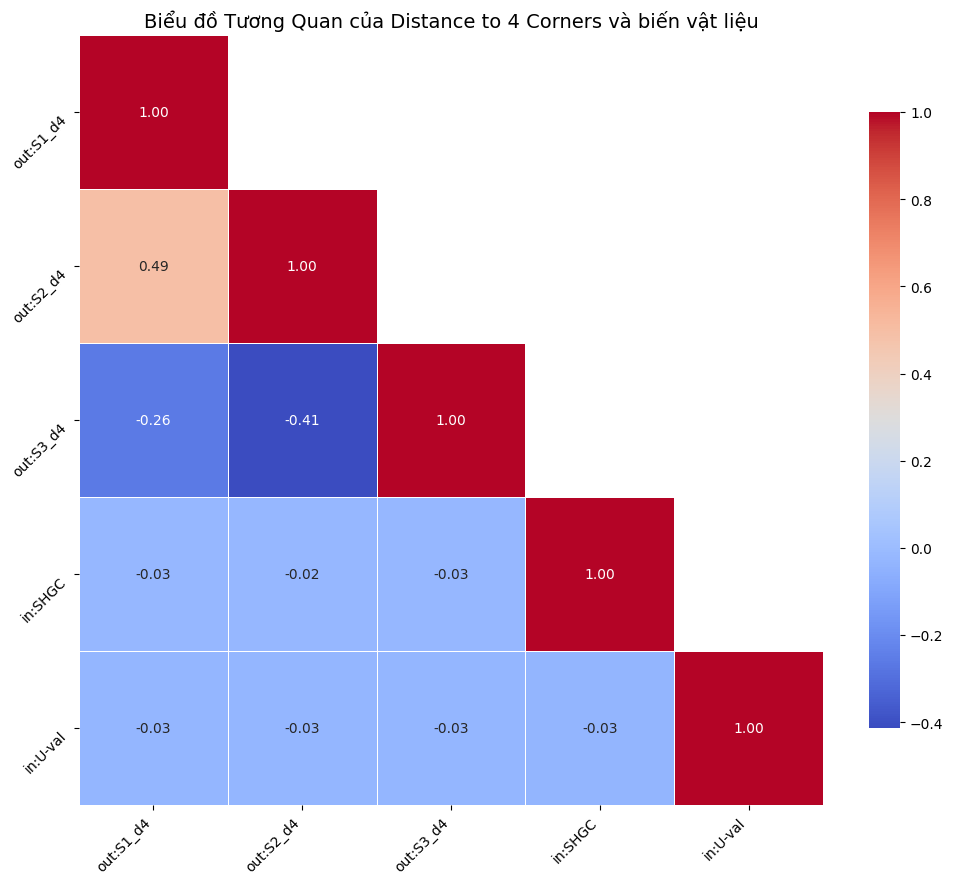

In [22]:
# Giả sử df là DataFrame gốc (chưa scale)
# scaled_df_standard là DataFrame đã chuẩn hóa bằng MinMaxScaler

# Lấy 2 biến cuối cùng
material = df_normalized.iloc[:, :2]

# Scale 2 biến cuối cùng bằng MinMaxScaler như các biến trong scaled_df_standard
scaler = MinMaxScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Ghép 2 biến đã scale vào subset_df
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Tính toán ma trận tương quan mới
corr_matrix_extended = extended_subset_df.corr()

# Tạo lại mask tam giác trên, trừ đường chéo
mask = np.triu(np.ones_like(corr_matrix_extended, dtype=bool), k=1)

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_extended, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8}, mask=mask)

# Xoay nhãn trục
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Thêm tiêu đề
plt.title("Biểu đồ Tương Quan của Distance to 4 Corners và biến vật liệu", fontsize=14)
plt.show()


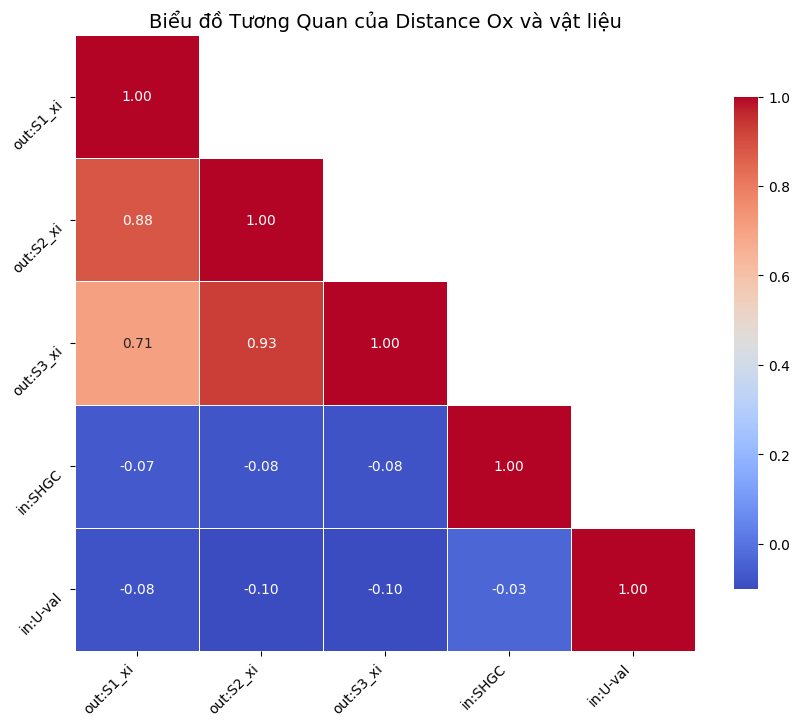

In [23]:
# Bước 1: Chọn 3 biến Ox từ scaled_df_standard
index_xi = [38, 44, 50]
subset_df = scaled_df_standard.iloc[:, index_xi]

# Bước 2: Lấy 2 biến cuối cùng từ DataFrame gốc (giả sử tên là df)
material = df_normalized.iloc[:, :2]

# Chuẩn hóa 2 biến cuối bằng MinMaxScaler để thống nhất với scaled_df_standard
scaler = MinMaxScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Bước 3: Ghép lại thành 1 DataFrame mở rộng
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Bước 4: Tính toán ma trận tương quan mở rộng
corr_matrix_extended = extended_subset_df.corr()

# Bước 5: Tạo mask tam giác trên (loại bỏ phần dư)
mask = np.triu(np.ones_like(corr_matrix_extended, dtype=bool), k=1)

# Bước 6: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_extended, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8}, mask=mask)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Bước 7: Tiêu đề
plt.title("Biểu đồ Tương Quan của Distance Ox và vật liệu", fontsize=14)
plt.show()


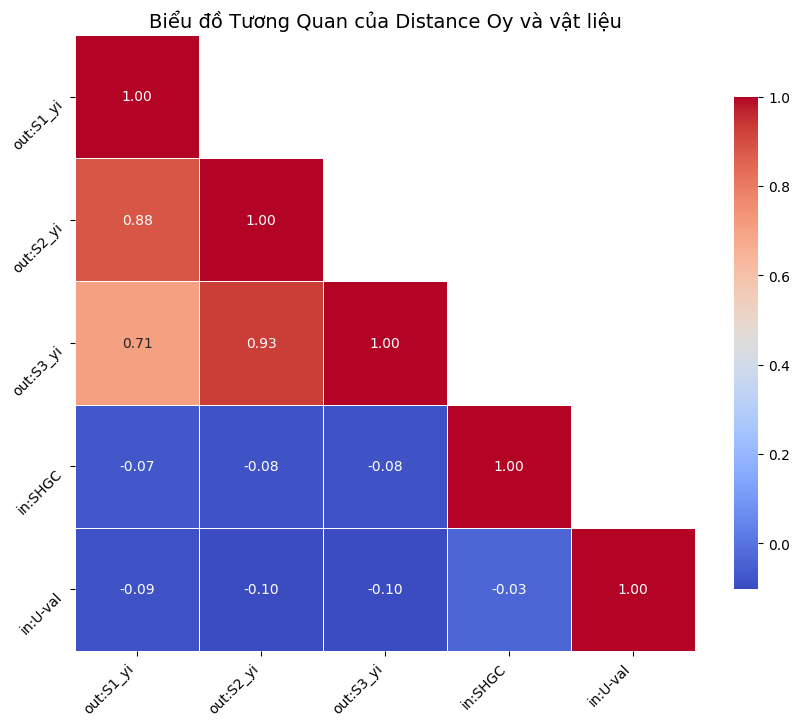

In [24]:
# Bước 1: Chọn 3 biến Oy từ scaled_df_standard
index_yi = [39, 45, 51]
subset_df = scaled_df_standard.iloc[:, index_yi]

# Bước 2: Lấy 2 biến cuối từ DataFrame gốc
material = df_normalized.iloc[:, :2]

# Chuẩn hóa 2 biến cuối để cùng scale
scaler = MinMaxScaler()
scaled_material = pd.DataFrame(scaler.fit_transform(material),
                               columns=material.columns,
                               index=df.index)

# Bước 3: Ghép lại thành 1 DataFrame mở rộng
extended_subset_df = pd.concat([subset_df, scaled_material], axis=1)

# Bước 4: Tính toán ma trận tương quan
corr_matrix_extended = extended_subset_df.corr()

# Bước 5: Mask tam giác trên
mask = np.triu(np.ones_like(corr_matrix_extended, dtype=bool), k=1)

# Bước 6: Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_extended, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8}, mask=mask)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Bước 7: Tiêu đề
plt.title("Biểu đồ Tương Quan của Distance Oy và vật liệu", fontsize=14)
plt.show()


Chia dữ liệu train - test

In [25]:
# Giả sử 'target_columns' là tên các cột biến mục tiêu của bạn
target_columns = ['out:Total-CoolingLoad (J)', 'out:Total_HEAT-LOSS(J)']

# Chia dữ liệu thành X và y
X = df_normalized.drop(columns=target_columns)
y = df_normalized[target_columns]


# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Kiểm tra kết quả
print(f"Số lượng đặc trưng (feature): {X.shape[1]}")
print(f"Kích thước tập X_train: {X_train.shape}")
print(f"Kích thước tập X_test: {X_test.shape}")
print(f"Kích thước tập y_train: {y_train.shape}")
print(f"Kích thước tập y_test: {y_test.shape}")


Số lượng đặc trưng (feature): 52
Kích thước tập X_train: (13039, 52)
Kích thước tập X_test: (3260, 52)
Kích thước tập y_train: (13039, 2)
Kích thước tập y_test: (3260, 2)


In [26]:
# Chia dữ liệu scale thành X và y
X_scale = scaled_df_standard.drop(columns=target_columns)  # Xử lý các cột đặc trưng
y_scale = scaled_df_standard[target_columns]  # Cột mục tiêu

X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_scale, y_scale, test_size=0.2, random_state=42)
# Kiểm tra kích thước của các tập train và test
print(f"Số lượng đặc trưng (feature): {X_scale.shape[1]}")
print(f"Kích thước tập X_train: {X_train_scale.shape}")
print(f"Kích thước tập X_test: {X_test_scale.shape}")
print(f"Kích thước tập y_train: {y_train_scale.shape}")
print(f"Kích thước tập y_test: {y_test_scale.shape}")


Số lượng đặc trưng (feature): 52
Kích thước tập X_train: (13039, 52)
Kích thước tập X_test: (3260, 52)
Kích thước tập y_train: (13039, 2)
Kích thước tập y_test: (3260, 2)


In [27]:
# Giả sử bạn đã tạo df_normalized (được chuẩn hóa theo L2)
# Và target_columns là tên các cột mục tiêu
target_columns = ['out:Total-CoolingLoad (J)', 'out:Total_HEAT-LOSS(J)']

# Chia dữ liệu thành X và y từ df_normalized
X = df_normalized.drop(columns=target_columns)
y = df_normalized[target_columns]

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Kiểm tra kết quả
print(f"Kích thước tập X_train: {X_train.shape}")
print(f"Kích thước tập X_test: {X_test.shape}")
print(f"Kích thước tập y_train: {y_train.shape}")
print(f"Kích thước tập y_test: {y_test.shape}")


Kích thước tập X_train: (13039, 52)
Kích thước tập X_test: (3260, 52)
Kích thước tập y_train: (13039, 2)
Kích thước tập y_test: (3260, 2)


In [28]:
# Dummy data dimensions (thay bằng dữ liệu thật của bạn)
input_dim = X_train.shape[1]                # số feature đầu vào
output_dim = len(target_columns)            # số đầu ra

# Learning rate schedule (Exponential Decay)
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True
)

# Model definition
model_1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(output_dim)
])

model_1.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mean_squared_error', metrics=['accuracy'])

# 🔍 Hiển thị thông tin parameters
model_1.summary()

# Hiển thị số lượng parameters từng layer (chi tiết hơn)
print("\nChi tiết các tham số học được (Weights + Biases):")
for i, layer in enumerate(model_1.layers):
    weights = layer.get_weights()
    if weights:
        weight_shape = [w.shape for w in weights]
        print(f"Layer {i+1} ({layer.name}):")
        print(f"  Weights shape: {weight_shape}")
        print(f"  Tổng tham số: {layer.count_params()}")
    else:
        print(f"Layer {i+1} ({layer.name}): No learnable parameters.")

# 📋 Hiển thị các Hyperparameter
print("\nHyperparameters:")
hyperparams = {
    "initial_learning_rate": lr_schedule.initial_learning_rate,
    "decay_steps": lr_schedule.decay_steps,
    "decay_rate": lr_schedule.decay_rate,
    "staircase": lr_schedule.staircase,
    "dropout_rates": [layer.rate for layer in model_1.layers if isinstance(layer, Dropout)],
    "optimizer": type(model_1.optimizer).__name__,
    "loss": model_1.loss,
    "activation_functions": [layer.activation.__name__ for layer in model_1.layers if isinstance(layer, Dense)],
    "dense_units": [layer.units for layer in model_1.layers if isinstance(layer, Dense)]
}
df = pd.DataFrame(list(hyperparams.items()), columns=["Hyperparameter", "Value"])
print(df.to_string(index=False))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        13,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,850 (214.26 KB)

 Trainable params: 54,850 (214.26 KB)

 Non-trainable params: 0 (0.00 B)


Chi tiết các tham số học được (Weights + Biases):
Layer 1 (dense):
  Weights shape: [(52, 256), (256,)]
  Tổng tham số: 13568
Layer 2 (dropout): No learnable parameters.
Layer 3 (dense_1):
  Weights shape: [(256, 128), (128,)]
  Tổng tham số: 32896
Layer 4 (dropout_1): No learnable parameters.
Layer 5 (dense_2):
  Weights shape: [(128, 64), (64,)]
  Tổng tham số: 8256
Layer 6 (dropout_2): No learnable parameters.
Layer 7 (dense_3):
  Weights shape: [(64, 2), (2,)]
  Tổng tham số: 130

Hyperparameters:
       Hyperparameter                      Value
initial_learning_rate                      0.001
          decay_steps                      10000
           decay_rate                        0.9
            staircase                       True
        dropout_rates            [0.4, 0.4, 0.2]
            optimizer                       Adam
                 loss         mean_squared_error
 activation_functions [relu, relu, relu, linear]
          dense_units          [256, 128, 64, 2]


In [29]:
# Mô hình ANN 2: Mô hình với nhiều lớp
model_2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    
    Dense(1024, activation='relu'),
    Dropout(0.4),
    Dense(516, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(len(target_columns))
])

model_2.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mean_squared_error', metrics=['accuracy'])

# 🔍 Hiển thị thông tin parameters
model_2.summary()

# Hiển thị số lượng parameters từng layer (chi tiết hơn)
print("\nChi tiết các tham số học được (Weights + Biases):")
for i, layer in enumerate(model_2.layers):
    weights = layer.get_weights()
    if weights:
        weight_shape = [w.shape for w in weights]
        print(f"Layer {i+1} ({layer.name}):")
        print(f"  Weights shape: {weight_shape}")
        print(f"  Tổng tham số: {layer.count_params()}")
    else:
        print(f"Layer {i+1} ({layer.name}): No learnable parameters.")

# 📋 Hiển thị các Hyperparameter
print("\nHyperparameters:")
hyperparams = {
    "initial_learning_rate": lr_schedule.initial_learning_rate,
    "decay_steps": lr_schedule.decay_steps,
    "decay_rate": lr_schedule.decay_rate,
    "staircase": lr_schedule.staircase,
    "dropout_rates": [layer.rate for layer in model_2.layers if isinstance(layer, Dropout)],
    "optimizer": type(model_2.optimizer).__name__,
    "loss": model_2.loss,
    "activation_functions": [layer.activation.__name__ for layer in model_2.layers if isinstance(layer, Dense)],
    "dense_units": [layer.units for layer in model_2.layers if isinstance(layer, Dense)]
}
df = pd.DataFrame(list(hyperparams.items()), columns=["Hyperparameter", "Value"])
print(df.to_string(index=False))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1024)           │        54,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 516)            │       528,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 516)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       132,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 732,102 (2.79 MB)

 Trainable params: 732,102 (2.79 MB)

 Non-trainable params: 0 (0.00 B)


Chi tiết các tham số học được (Weights + Biases):
Layer 1 (dense_4):
  Weights shape: [(52, 1024), (1024,)]
  Tổng tham số: 54272
Layer 2 (dropout_3): No learnable parameters.
Layer 3 (dense_5):
  Weights shape: [(1024, 516), (516,)]
  Tổng tham số: 528900
Layer 4 (dropout_4): No learnable parameters.
Layer 5 (dense_6):
  Weights shape: [(516, 256), (256,)]
  Tổng tham số: 132352
Layer 6 (dropout_5): No learnable parameters.
Layer 7 (dense_7):
  Weights shape: [(256, 64), (64,)]
  Tổng tham số: 16448
Layer 8 (dense_8):
  Weights shape: [(64, 2), (2,)]
  Tổng tham số: 130

Hyperparameters:
       Hyperparameter                            Value
initial_learning_rate                            0.001
          decay_steps                            10000
           decay_rate                              0.9
            staircase                             True
        dropout_rates                  [0.4, 0.2, 0.2]
            optimizer                             Adam
                 l

In [30]:
# Mô hình ANN 3: Mô hình phức tạp hơn
model_3 = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(1024),
    LeakyReLU(negative_slope=0.01),
    Dropout(0.5),

    Dense(516),
    LeakyReLU(negative_slope=0.01),
    Dropout(0.2),

    Dense(256),
    LeakyReLU(negative_slope=0.01),
    Dropout(0.3),

    Dense(64),
    LeakyReLU(negative_slope=0.01),

    Dense(len(target_columns))  # No activation for regression output
])

model_3.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mean_squared_error', metrics=['accuracy'])

model_3.summary()

# Hiển thị số lượng parameters từng layer (chi tiết hơn)
print("\nChi tiết các tham số học được (Weights + Biases):")
for i, layer in enumerate(model_3.layers):
    weights = layer.get_weights()
    if weights:
        weight_shape = [w.shape for w in weights]
        print(f"Layer {i+1} ({layer.name}):")
        print(f"  Weights shape: {weight_shape}")
        print(f"  Tổng tham số: {layer.count_params()}")
    else:
        print(f"Layer {i+1} ({layer.name}): No learnable parameters.")

# 📋 Hiển thị các Hyperparameter
print("\nHyperparameters:")
hyperparams = {
    "initial_learning_rate": lr_schedule.initial_learning_rate,
    "decay_steps": lr_schedule.decay_steps,
    "decay_rate": lr_schedule.decay_rate,
    "staircase": lr_schedule.staircase,
    "dropout_rates": [layer.rate for layer in model_3.layers if isinstance(layer, Dropout)],
    "optimizer": type(model_3.optimizer).__name__,
    "loss": model_3.loss,
    "activation_functions": [layer.activation.__name__ for layer in model_3.layers if isinstance(layer, Dense)],
    "dense_units": [layer.units for layer in model_3.layers if isinstance(layer, Dense)]
}
df = pd.DataFrame(list(hyperparams.items()), columns=["Hyperparameter", "Value"])
print(df.to_string(index=False))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1024)           │        54,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 516)            │       528,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 516)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 516)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       132,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 732,102 (2.79 MB)

 Trainable params: 732,102 (2.79 MB)

 Non-trainable params: 0 (0.00 B)


Chi tiết các tham số học được (Weights + Biases):
Layer 1 (dense_9):
  Weights shape: [(52, 1024), (1024,)]
  Tổng tham số: 54272
Layer 2 (leaky_re_lu): No learnable parameters.
Layer 3 (dropout_6): No learnable parameters.
Layer 4 (dense_10):
  Weights shape: [(1024, 516), (516,)]
  Tổng tham số: 528900
Layer 5 (leaky_re_lu_1): No learnable parameters.
Layer 6 (dropout_7): No learnable parameters.
Layer 7 (dense_11):
  Weights shape: [(516, 256), (256,)]
  Tổng tham số: 132352
Layer 8 (leaky_re_lu_2): No learnable parameters.
Layer 9 (dropout_8): No learnable parameters.
Layer 10 (dense_12):
  Weights shape: [(256, 64), (64,)]
  Tổng tham số: 16448
Layer 11 (leaky_re_lu_3): No learnable parameters.
Layer 12 (dense_13):
  Weights shape: [(64, 2), (2,)]
  Tổng tham số: 130

Hyperparameters:
       Hyperparameter                                    Value
initial_learning_rate                                    0.001
          decay_steps                                    10000
         

In [31]:
# Import đầy đủ các thư viện cần thiết
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hàm phụ
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-8))) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8)) * 100

# Hàm đánh giá mô hình
def evaluate_model_sklearn(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    smape = symmetric_mean_absolute_percentage_error(y_test, y_pred)

    return rmse, mae, r2, mape, smape

# Khởi tạo và đánh giá các mô hình
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": MultiOutputRegressor(SVR(kernel='rbf'))  # Hỗ trợ cho đầu ra nhiều biến
}

# Kết quả
results = {
    "Model": [],
    "RMSE": [],
    "MAE": [],
    "R²": [],
    "MAPE (%)": [],
    "SMAPE (%)": [],
}

# Đánh giá từng mô hình
for name, model in models.items():
    rmse, mae, r2, mape, smape = evaluate_model_sklearn(model, X_train_scale, X_test_scale, y_train_scale, y_test_scale)
    results["Model"].append(name)
    results["RMSE"].append(rmse)
    results["MAE"].append(mae)
    results["R²"].append(r2)
    results["MAPE (%)"].append(mape)
    results["SMAPE (%)"].append(smape)

# Hiển thị kết quả
results_df = pd.DataFrame(results)
print(results_df)


               Model      RMSE       MAE        R²   MAPE (%)  SMAPE (%)
0  Linear Regression  0.084640  0.063320  0.892240  95.932854  25.029899
1      Decision Tree  0.012068  0.008191  0.997874   4.214198   3.856683
2      Random Forest  0.008520  0.005894  0.998940   3.313881   2.796465
3                SVR  0.063655  0.051169  0.939291  49.228638  22.272342


In [32]:
import concurrent.futures
import matplotlib.pyplot as plt

# Định nghĩa hàm huấn luyện mô hình với tên mô hình
def train_model(model, model_name, X_train, y_train, epochs, batch_size):
    print(f"Training {model_name}...")
    return model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

# Sử dụng ThreadPoolExecutor để chạy song song
epochs = 100
batch_size = 32

with concurrent.futures.ThreadPoolExecutor() as executor:
    # Chạy 3 mô hình song song và gán tên cho từng mô hình
    futures = [
        executor.submit(train_model, model_1, "Model 1", X_train, y_train, epochs, batch_size),
        executor.submit(train_model, model_2, "Model 2", X_train, y_train, epochs, batch_size),
        executor.submit(train_model, model_3, "Model 3", X_train, y_train, epochs, batch_size)
    ]
    
    # Chờ tất cả các quá trình huấn luyện kết thúc
    results = [future.result() for future in futures]

# Lấy kết quả huấn luyện cho từng mô hình
history_1, history_2, history_3 = results


Training Model 1...
Training Model 2...
Training Model 3...
Epoch 1/100
Epoch 1/100
Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7160 - loss: 0.0064 - val_accuracy: 0.9379 - val_loss: 5.7331e-04
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8046 - loss: 0.0029 - val_accuracy: 0.9532 - val_loss: 3.2954e-04
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8185 - loss: 0.0025 - val_accuracy: 0.9551 - val_loss: 2.0636e-04
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9092 - loss: 0.0011 - val_accuracy: 0.9467 - val_loss: 3.2339e-04
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9200 - loss: 7.7748e-04 - val_accuracy: 0.9567 - val_loss: 2.0581e-04
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9381 - loss: 4.2067e-04 - val_accuracy: 0.9528 - val_loss: 1.7709e-04
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9296 - loss: 5.4384e-04 - val_accuracy: 0.9666 - val_

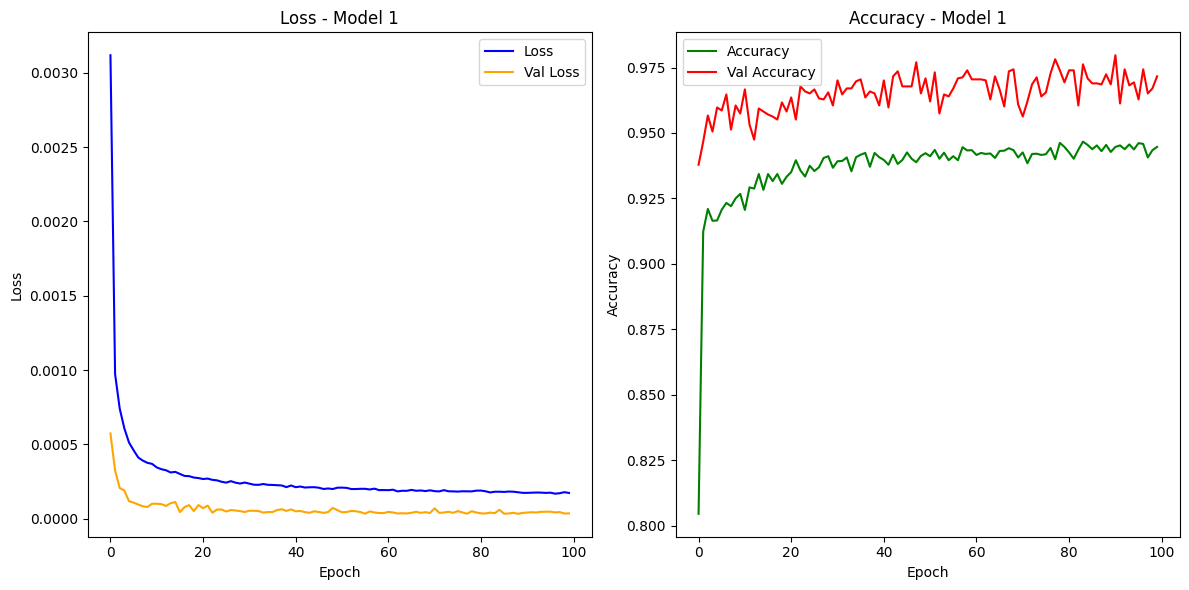

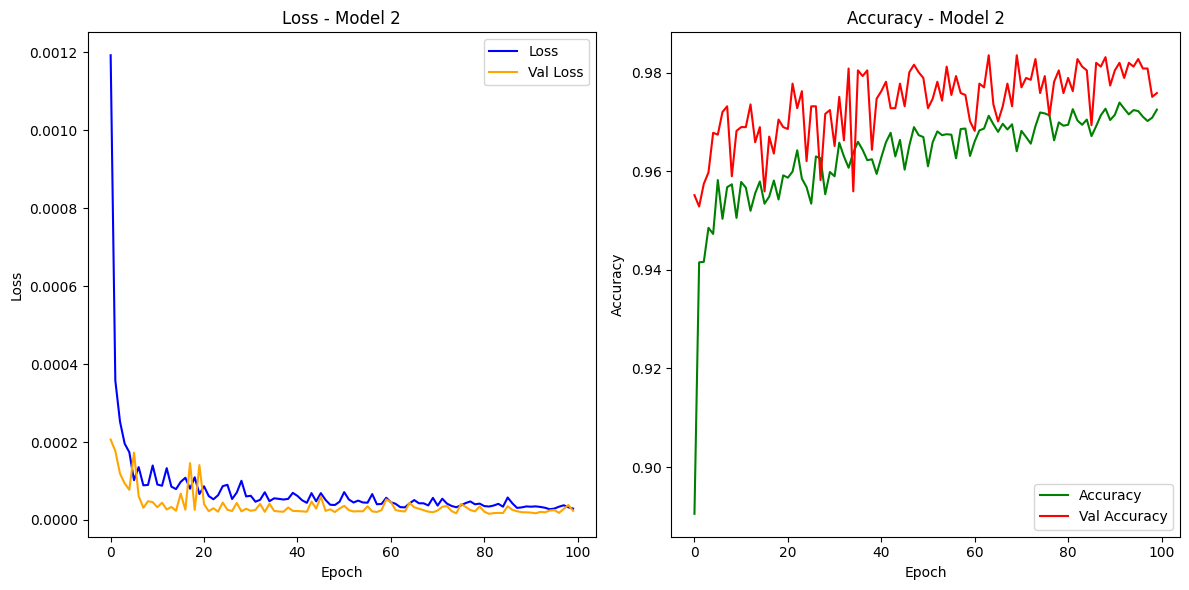

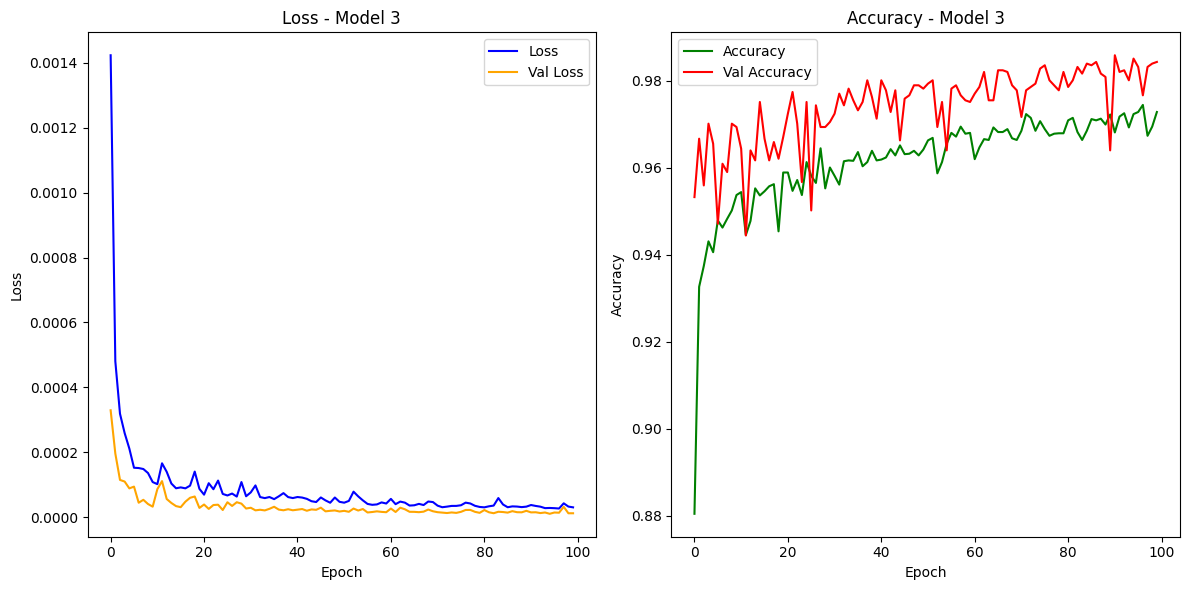

In [33]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 6))
    
    # Vẽ loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
    plt.title(f'Loss - {model_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Vẽ accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy', color='green')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='red')
    plt.title(f'Accuracy - {model_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Vẽ đồ thị cho từng mô hình
plot_history(history_1, 'Model 1')
plot_history(history_2, 'Model 2')
plot_history(history_3, 'Model 3')

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_flat = y_pred  # Có thể reshape nếu cần thiết tùy thuộc vào mô hình

    # Tính các chỉ số đánh giá
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_flat))
    mae = mean_absolute_error(y_test, y_pred_flat)
    r2 = r2_score(y_test, y_pred_flat)
    mape = mean_absolute_percentage_error(y_test, y_pred_flat)
    smape = symmetric_mean_absolute_percentage_error(y_test, y_pred_flat)

    return rmse, mae, r2, mape, smape

In [34]:
# Đánh giá mô hình 1
rmse_1, mae_1, r2_1, mape_1, smape_1 = evaluate_model(model_1, X_test, y_test)
print(f'Model 1 - RMSE: {rmse_1:.4f}, MAE: {mae_1:.4f}, R²: {r2_1:.4f}, MAPE: {mape_1:.2f}%, SMAPE: {smape_1:.2f}%')

# Đánh giá mô hình 2
rmse_2, mae_2, r2_2, mape_2, smape_2 = evaluate_model(model_2, X_test, y_test)
print(f'Model 2 - RMSE: {rmse_2:.4f}, MAE: {mae_2:.4f}, R²: {r2_2:.4f}, MAPE: {mape_2:.2f}%, SMAPE: {smape_2:.2f}%')

# Đánh giá mô hình 3
rmse_3, mae_3, r2_3, mape_3, smape_3 = evaluate_model(model_3, X_test, y_test)
print(f'Model 3 - RMSE: {rmse_3:.4f}, MAE: {mae_3:.4f}, R²: {r2_3:.4f}, MAPE: {mape_3:.2f}%, SMAPE: {smape_3:.2f}%')


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Model 1 - RMSE: 0.0060, MAE: 0.0047, R²: 0.9923, MAPE: 14.39%, SMAPE: 8.44%
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 2 - RMSE: 0.0049, MAE: 0.0035, R²: 0.9947, MAPE: 7.88%, SMAPE: 5.40%
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model 3 - RMSE: 0.0034, MAE: 0.0024, R²: 0.9975, MAPE: 7.15%, SMAPE: 4.80%


In [35]:
comparison_results = {
    "Model": [
        "ANN - Model 1",
        "ANN - Model 2",
        "ANN - Model 3",
        "Linear Regression",
        "Decision Tree",
        "Random Forest",
        "SVR"
    ],
    "RMSE": [
        rmse_1, rmse_2, rmse_3,
        float(results_df.loc[results_df["Model"] == "Linear Regression", "RMSE"].values[0]),
        float(results_df.loc[results_df["Model"] == "Decision Tree", "RMSE"].values[0]),
        float(results_df.loc[results_df["Model"] == "Random Forest", "RMSE"].values[0]),
        float(results_df.loc[results_df["Model"] == "SVR", "RMSE"].values[0])
    ],
    "MAE": [
        mae_1, mae_2, mae_3,
        float(results_df.loc[results_df["Model"] == "Linear Regression", "MAE"].values[0]),
        float(results_df.loc[results_df["Model"] == "Decision Tree", "MAE"].values[0]),
        float(results_df.loc[results_df["Model"] == "Random Forest", "MAE"].values[0]),
        float(results_df.loc[results_df["Model"] == "SVR", "MAE"].values[0])
    ],
    "R²": [
        r2_1, r2_2, r2_3,
        float(results_df.loc[results_df["Model"] == "Linear Regression", "R²"].values[0]),
        float(results_df.loc[results_df["Model"] == "Decision Tree", "R²"].values[0]),
        float(results_df.loc[results_df["Model"] == "Random Forest", "R²"].values[0]),
        float(results_df.loc[results_df["Model"] == "SVR", "R²"].values[0])
    ],
    "MAPE (%)": [
        mape_1, mape_2, mape_3,
        float(results_df.loc[results_df["Model"] == "Linear Regression", "MAPE (%)"].values[0]),
        float(results_df.loc[results_df["Model"] == "Decision Tree", "MAPE (%)"].values[0]),
        float(results_df.loc[results_df["Model"] == "Random Forest", "MAPE (%)"].values[0]),
        float(results_df.loc[results_df["Model"] == "SVR", "MAPE (%)"].values[0])
    ],
    "SMAPE (%)": [
        smape_1, smape_2, smape_3,
        float(results_df.loc[results_df["Model"] == "Linear Regression", "SMAPE (%)"].values[0]),
        float(results_df.loc[results_df["Model"] == "Decision Tree", "SMAPE (%)"].values[0]),
        float(results_df.loc[results_df["Model"] == "Random Forest", "SMAPE (%)"].values[0]),
        float(results_df.loc[results_df["Model"] == "SVR", "SMAPE (%)"].values[0])
    ]
}

comparison_df = pd.DataFrame(comparison_results)

print("🔍 So sánh hiệu suất giữa các mô hình ANN và học máy truyền thống:")
print(comparison_df.sort_values(by="RMSE"))


🔍 So sánh hiệu suất giữa các mô hình ANN và học máy truyền thống:
               Model      RMSE       MAE        R²   MAPE (%)  SMAPE (%)
2      ANN - Model 3  0.003399  0.002449  0.997521   7.146167   4.797563
1      ANN - Model 2  0.004929  0.003527  0.994700   7.881246   5.404258
0      ANN - Model 1  0.005967  0.004697  0.992315  14.385688   8.442143
5      Random Forest  0.008520  0.005894  0.998940   3.313881   2.796465
4      Decision Tree  0.012068  0.008191  0.997874   4.214198   3.856683
6                SVR  0.063655  0.051169  0.939291  49.228638  22.272342
3  Linear Regression  0.084640  0.063320  0.892240  95.932854  25.029899


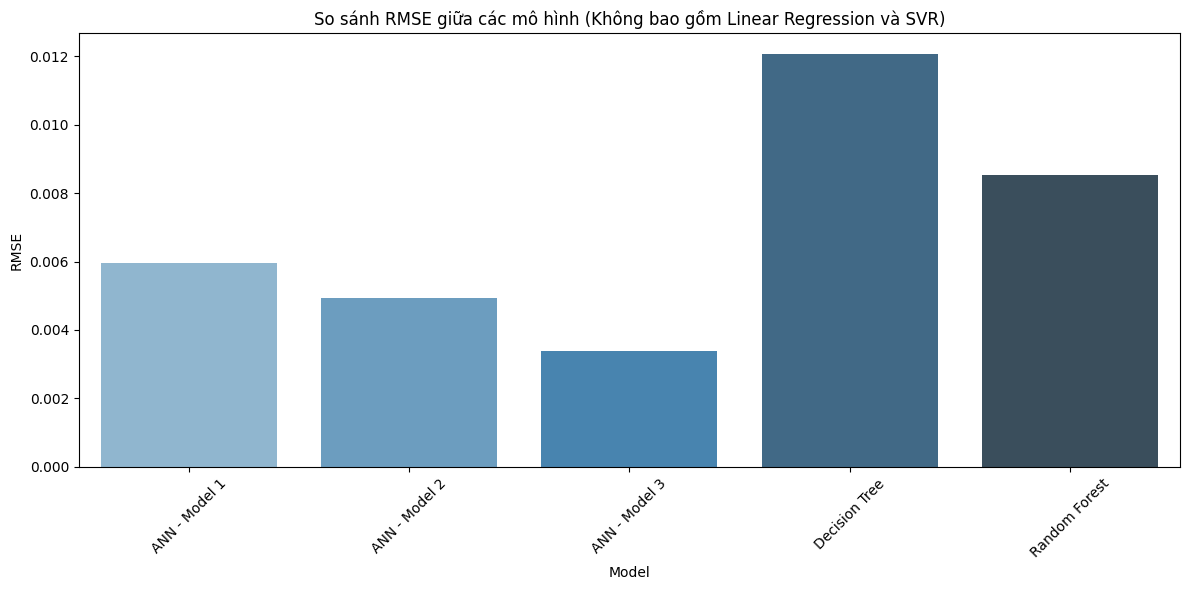

In [36]:
# Lọc bỏ Linear Regression và SVR
filtered_comparison_df = comparison_df[~comparison_df["Model"].isin(["Linear Regression", "SVR"])]

# Trực quan hóa RMSE (cập nhật)
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_comparison_df, x="Model", y="RMSE", palette="Blues_d", hue="Model", legend=False)
plt.xticks(rotation=45)
plt.title("So sánh RMSE giữa các mô hình (Không bao gồm Linear Regression và SVR)")
plt.ylabel("RMSE")
plt.tight_layout()
plt.show()

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


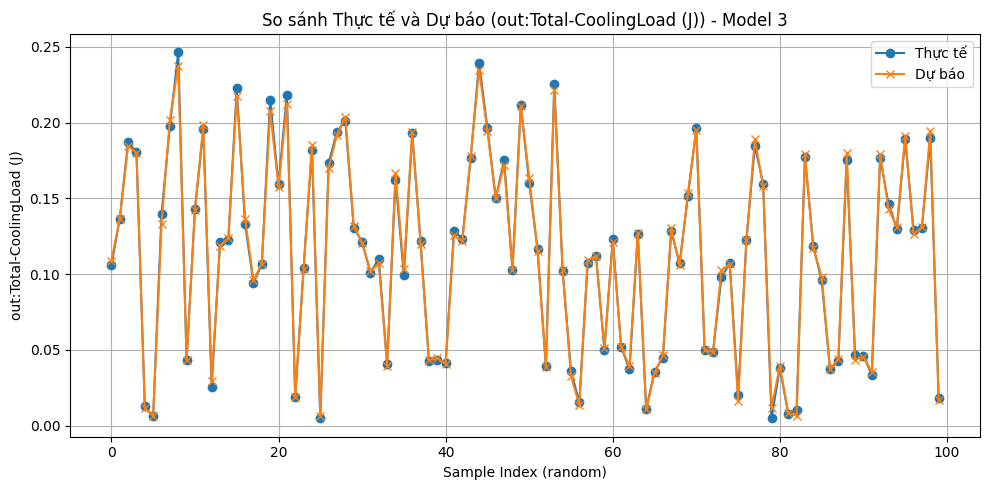

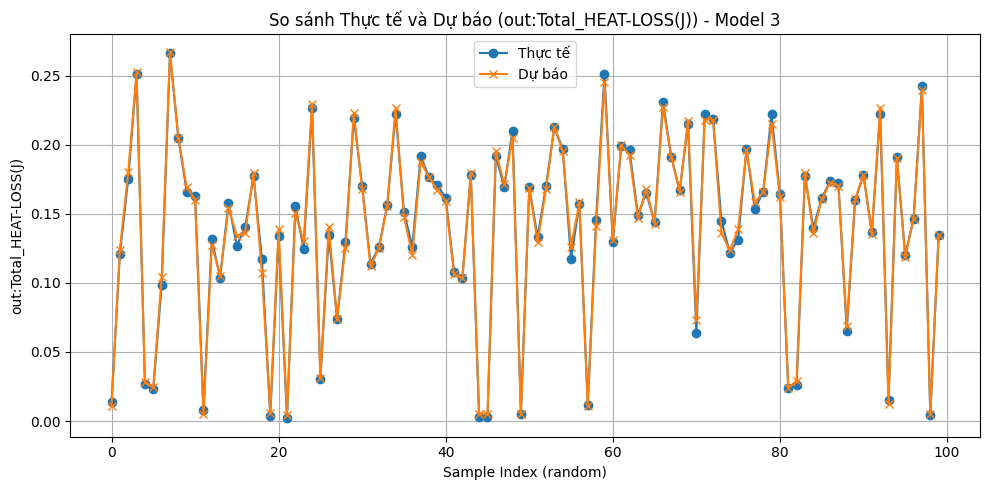

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Hàm vẽ biểu đồ so sánh với mẫu ngẫu nhiên
def plot_predictions(y_true, y_pred, feature_names, model_name, num_samples=100):
    np.random.seed(42)  # Giữ kết quả random ổn định
    indices = np.random.choice(len(y_true), size=num_samples, replace=False)
    
    for i, feature in enumerate(feature_names):
        plt.figure(figsize=(10, 5))
        plt.plot(range(num_samples), y_true.iloc[indices, i], label='Thực tế', marker='o')
        plt.plot(range(num_samples), y_pred[indices, i], label='Dự báo', marker='x')
        plt.title(f'So sánh Thực tế và Dự báo ({feature}) - {model_name}')
        plt.xlabel('Sample Index (random)')
        plt.ylabel(feature)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Gọi hàm cho từng mô hình
plot_predictions(y_test, model_3.predict(X_test), target_columns, "Model 3")


In [38]:
# Các cột cần loại bỏ (gồm target + 'in:U-val')
columns_to_remove_b1 = target_columns + ['in:U-val']

# Tạo X_b1 (features) và y_b1 (labels)
X_b1 = df_normalized.drop(columns=columns_to_remove_b1)
y_b1 = df_normalized[target_columns]

# Chia train/test
X_train_b1, X_test_b1, y_train_b1, y_test_b1 = train_test_split(X_b1, y_b1, test_size=0.2, random_state=42)

# In kích thước các tập
print(f"Số lượng đặc trưng (feature): {X_b1.shape[1]}")
print(f"Kích thước tập X_train_b1: {X_train_b1.shape}")
print(f"Kích thước tập X_test_b1: {X_test_b1.shape}")
print(f"Kích thước tập y_train_b1: {y_train_b1.shape}")
print(f"Kích thước tập y_test_b1: {y_test_b1.shape}")

Số lượng đặc trưng (feature): 51
Kích thước tập X_train_b1: (13039, 51)
Kích thước tập X_test_b1: (3260, 51)
Kích thước tập y_train_b1: (13039, 2)
Kích thước tập y_test_b1: (3260, 2)


In [39]:
# Cột cần loại bỏ cho B2
columns_to_remove_b2 = target_columns + ['in:SHGC']

# Tạo X_b2 và y_b2
X_b2 = df_normalized.drop(columns=columns_to_remove_b2)
y_b2 = df_normalized[target_columns]

# Chia train/test cho B2
X_train_b2, X_test_b2, y_train_b2, y_test_b2 = train_test_split(X_b2, y_b2, test_size=0.2, random_state=42)

# Kiểm tra
print(f"Số lượng đặc trưng (feature): {X_b2.shape[1]}")
print(f"[B2] Kích thước tập X_train_b2: {X_train_b2.shape}")
print(f"[B2] Kích thước tập X_test_b2: {X_test_b2.shape}")
print(f"[B2] Kích thước tập y_train_b2: {y_train_b2.shape}")
print(f"[B2] Kích thước tập y_test_b2: {y_test_b2.shape}")

Số lượng đặc trưng (feature): 51
[B2] Kích thước tập X_train_b2: (13039, 51)
[B2] Kích thước tập X_test_b2: (3260, 51)
[B2] Kích thước tập y_train_b2: (13039, 2)
[B2] Kích thước tập y_test_b2: (3260, 2)


In [40]:
# Tìm các cột cần loại bỏ cho B3
columns_to_remove_b3 = target_columns + \
    [col for col in df_normalized.columns if (col.endswith('_l') or col.endswith('_r'))]

# Tạo X_b3 và y_b3
X_b3 = df_normalized.drop(columns=columns_to_remove_b3)
y_b3 = df_normalized[target_columns]

# Chia train/test
X_train_b3, X_test_b3, y_train_b3, y_test_b3 = train_test_split(X_b3, y_b3, test_size=0.2, random_state=42)

# Kiểm tra
print(f"Số lượng đặc trưng (feature): {X_b3.shape[1]}")
print(f"[B3] Kích thước X_train_b3: {X_train_b3.shape}")
print(f"[B3] Kích thước X_test_b3: {X_test_b3.shape}")
print(f"[B3] Kích thước y_train_b3: {y_train_b3.shape}")
print(f"[B3] Kích thước y_test_b3: {y_test_b3.shape}")


Số lượng đặc trưng (feature): 36
[B3] Kích thước X_train_b3: (13039, 36)
[B3] Kích thước X_test_b3: (3260, 36)
[B3] Kích thước y_train_b3: (13039, 2)
[B3] Kích thước y_test_b3: (3260, 2)


In [41]:
# Tìm các cột cần loại bỏ cho B4
columns_to_remove_b4 = target_columns + \
    [col for col in df_normalized.columns if (col.endswith('_l') or col.endswith('_r') or col.endswith('_x') or col.endswith('_y') or col.endswith('-y'))]

# Tạo X_b4 và y_b4
X_b4 = df_normalized.drop(columns=columns_to_remove_b4)
y_b4 = df_normalized[target_columns]

# Chia train/test
X_train_b4, X_test_b4, y_train_b4, y_test_b4 = train_test_split(X_b4, y_b4, test_size=0.2, random_state=42)

# Kiểm tra
print(f"Số lượng đặc trưng (feature): {X_b4.shape[1]}")
print(f"[B4] Kích thước X_train_b4: {X_train_b4.shape}")
print(f"[B4] Kích thước X_test_b4: {X_test_b4.shape}")
print(f"[B4] Kích thước y_train_b4: {y_train_b4.shape}")
print(f"[B4] Kích thước y_test_b4: {y_test_b4.shape}")

Số lượng đặc trưng (feature): 20
[B4] Kích thước X_train_b4: (13039, 20)
[B4] Kích thước X_test_b4: (3260, 20)
[B4] Kích thước y_train_b4: (13039, 2)
[B4] Kích thước y_test_b4: (3260, 2)


In [42]:
# Tìm các cột cần loại bỏ cho B5
columns_to_remove_b5 = target_columns + \
    [col for col in df_normalized.columns if (col.startswith('out:S'))]

# Tạo X_b5 và y_b5
X_b5 = df_normalized.drop(columns=columns_to_remove_b5)
y_b5 = df_normalized[target_columns]

# Chia train/test
X_train_b5, X_test_b5, y_train_b5, y_test_b5 = train_test_split(X_b5, y_b5, test_size=0.2, random_state=42)

# Kiểm tra
print(f"Số lượng đặc trưng (feature): {X_b5.shape[1]}")
print(f"[B5] Kích thước X_train_b5: {X_train_b5.shape}")
print(f"[B5] Kích thước X_test_b5: {X_test_b5.shape}")
print(f"[B5] Kích thước y_train_b5: {y_train_b5.shape}")
print(f"[B5] Kích thước y_test_b5: {y_test_b5.shape}")


Số lượng đặc trưng (feature): 34
[B5] Kích thước X_train_b5: (13039, 34)
[B5] Kích thước X_test_b5: (3260, 34)
[B5] Kích thước y_train_b5: (13039, 2)
[B5] Kích thước y_test_b5: (3260, 2)


In [43]:
# Tìm các cột cần lấy cho B6
X_b6 = df_normalized[['in:SHGC', 'in:U-val']]  # Chọn chính xác hai cột cần thiết
y_b6 = df_normalized[target_columns]

# Chia train/test
X_train_b6, X_test_b6, y_train_b6, y_test_b6 = train_test_split(X_b6, y_b6, test_size=0.2, random_state=42)

# Kiểm tra
print(f"Số lượng đặc trưng (feature): {X_b6.shape[1]}")
print(f"[B6] Kích thước X_train_b6: {X_train_b6.shape}")
print(f"[B6] Kích thước X_test_b6: {X_test_b6.shape}")
print(f"[B6] Kích thước y_train_b6: {y_train_b6.shape}")
print(f"[B6] Kích thước y_test_b6: {y_test_b6.shape}")


Số lượng đặc trưng (feature): 2
[B6] Kích thước X_train_b6: (13039, 2)
[B6] Kích thước X_test_b6: (3260, 2)
[B6] Kích thước y_train_b6: (13039, 2)
[B6] Kích thước y_test_b6: (3260, 2)


In [44]:
import os
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, LeakyReLU
from tensorflow.keras.optimizers import Adam

# Hàm tạo mô hình ANN
def create_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(1024),
        LeakyReLU(negative_slope=0.01),
        Dropout(0.5),
        Dense(516),
        LeakyReLU(negative_slope=0.01),
        Dropout(0.2),
        Dense(256),
        LeakyReLU(negative_slope=0.01),
        Dropout(0.3),
        Dense(64),
        LeakyReLU(negative_slope=0.01),
        Dense(len(target_columns))  # Regression output
    ])
    model.compile(optimizer=Adam(learning_rate=lr_schedule),
                  loss='mean_squared_error',
                  metrics=['accuracy'])
    return model

# Hàm huấn luyện mô hình và tính metrics
def train_model(model, X_train, y_train, X_test, y_test, model_name):
    model_path = f"{model_name}.keras"
    
    if os.path.exists(model_path):
        print(f"📦 Đã có {model_name}, đang load model từ file...")
        model.load_weights(model_path)
        y_pred = model.predict(X_test)
    else:
        print(f"🔄 Training model: {model_name}")
        history = model.fit(
            X_train, y_train,
            epochs=100,
            batch_size=32,
            validation_data=(X_test, y_test),
            verbose=1
        )
        model.save(model_path)
        print(f"💾 Model {model_name} đã được lưu vào {model_path}")
        y_pred = model.predict(X_test)

    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    smape_val = np.mean(np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred))) * 100
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"✅ {model_name} Done! RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")
    
    # Nếu không train (model đã load), trả về history rỗng
    return model_name, history.history if 'history' in locals() else {}, (rmse, mae, r2, mape, smape_val)


# Hàm kiểm tra và tải kết quả nếu đã huấn luyện
def check_and_load_results(file_path):
    if os.path.exists(file_path):
        print("📁 Đã tìm thấy kết quả huấn luyện trước đó. Đang tải từ file...")
        results_df = pd.read_excel(file_path)
        print("\n📈 Kết quả mô hình ANN đã lưu:")
        print(results_df)
        return results_df
    else:
        print("🚀 Không tìm thấy kết quả trước đó. Đang huấn luyện lại các mô hình...")
        return None

# Block huấn luyện (chạy trước)
def train_all_models():
    file_path = "results_ann_models.xlsx"
    results_df = check_and_load_results(file_path)

    # Nếu kết quả đã tồn tại, không cần huấn luyện lại
    if results_df is not None:
        return results_df

    global all_histories, all_metrics, all_names
    all_histories = []
    all_metrics = []
    all_names = []

    model_data = [
        (X_train_b1, X_test_b1, y_train_b1, y_test_b1, 'Model_3_b1'),
        (X_train_b2, X_test_b2, y_train_b2, y_test_b2, 'Model_3_b2'),
        (X_train_b3, X_test_b3, y_train_b3, y_test_b3, 'Model_3_b3'),
        (X_train_b4, X_test_b4, y_train_b4, y_test_b4, 'Model_3_b4'),
        (X_train_b5, X_test_b5, y_train_b5, y_test_b5, 'Model_3_b5'),
        (X_train_b6, X_test_b6, y_train_b6, y_test_b6, 'Model_3_b6'),
    ]

    with ThreadPoolExecutor(max_workers=6) as executor:
        futures = []
        for X_train, X_test, y_train, y_test, name in model_data:
            model = create_model(X_train.shape[1])
            futures.append(executor.submit(train_model, model, X_train, y_train, X_test, y_test, name))

        for future in futures:
            name, history, metrics = future.result()
            all_names.append(name)
            all_histories.append(history)
            all_metrics.append(metrics)

    # 📊 Hiển thị tổng hợp các metric
    print("\n📈 Tổng hợp kết quả các mô hình:")
    print(f"{'Model':<12} {'RMSE':>8} {'MAE':>8} {'R²':>8} {'MAPE (%)':>12} {'SMAPE (%)':>12}")
    print("-" * 60)
    for name, (rmse, mae, r2, mape, smape_val) in zip(all_names, all_metrics):
        print(f"{name:<12} {rmse:>8.4f} {mae:>8.4f} {r2:>8.4f} {mape:>12.4f} {smape_val:>12.4f}")

    # Lưu kết quả vào file Excel
    results_df = pd.DataFrame({
        "Model": all_names,
        "RMSE": [m[0] for m in all_metrics],
        "MAE": [m[1] for m in all_metrics],
        "R²": [m[2] for m in all_metrics],
        "MAPE (%)": [m[3] for m in all_metrics],
        "SMAPE (%)": [m[4] for m in all_metrics]
    })
    results_df.to_excel(file_path, index=False)
    print(f"\n💾 Kết quả đã được lưu vào '{file_path}'")

    return results_df

# Chạy huấn luyện và hiển thị kết quả
train_all_models()


🚀 Không tìm thấy kết quả trước đó. Đang huấn luyện lại các mô hình...
🔄 Training model: Model_3_b1
🔄 Training model: Model_3_b2
Epoch 1/100
Epoch 1/100
🔄 Training model: Model_3_b3
Epoch 1/100
🔄 Training model: Model_3_b4
Epoch 1/100
🔄 Training model: Model_3_b5
Epoch 1/100
🔄 Training model: Model_3_b6
Epoch 1/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.6962 - loss: 0.0036 - val_accuracy: 0.7497 - val_loss: 0.0023
Epoch 2/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.6721 - loss: 0.0046 - val_accuracy: 0.7475 - val_loss: 0.0027
Epoch 2/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.8683 - loss: 0.0022 - val_accuracy: 0.9564 - val_loss: 1.5226e-04
Epoch 2/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.8406 - loss: 0.0020 - val_accuracy: 0.9417 - val_loss: 2.5635e-04
Epoch 2/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.8497 - loss: 0.0023 - val_accuracy: 0.9469 - val_loss: 3.6836e-04
 51/408 ━━━━━━━━━━━━━━━━━━━━ 

C:\Users\MINH KHOI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


408/408 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8852 - loss: 5.6471e-04 - val_accuracy: 0.9147 - val_loss: 3.2380e-04
352/408 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8983 - loss: 8.6137e-04Epoch 97/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.8989 - loss: 8.5872e-04 - val_accuracy: 0.9531 - val_loss: 5.7479e-04
220/408 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9716 - loss: 3.2267e-05Epoch 97/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9757 - loss: 2.7704e-05 - val_accuracy: 0.9831 - val_loss: 1.1317e-05
Epoch 89/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9710 - loss: 2.3666e-05 - val_accuracy: 0.9822 - val_loss: 1.0955e-05
241/408 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9017 - loss: 8.7628e-04💾 Model Model_3_b5 đã được lưu vào Model_3_b5.keras
408/408 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9711 - loss: 3.2405e-05 - val_accuracy: 0.9755 - val_loss: 1.0814e-05
 88/408 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/s

C:\Users\MINH KHOI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


408/408 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9008 - loss: 8.7785e-04 - val_accuracy: 0.9181 - val_loss: 6.0587e-04
Epoch 98/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9755 - loss: 2.2981e-05 - val_accuracy: 0.9810 - val_loss: 1.2577e-05
Epoch 90/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9728 - loss: 3.0808e-05 - val_accuracy: 0.9770 - val_loss: 1.6184e-05
285/408 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9018 - loss: 8.3440e-04Epoch 89/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8880 - loss: 5.7021e-04 - val_accuracy: 0.9089 - val_loss: 3.4026e-04
Epoch 99/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9022 - loss: 8.4140e-04 - val_accuracy: 0.9390 - val_loss: 6.6796e-04
Epoch 99/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9757 - loss: 2.4828e-05 - val_accuracy: 0.9828 - val_loss: 1.0768e-05
192/408 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9116 - loss: 7.5916e-04Epoch 91/100
408/408 

C:\Users\MINH KHOI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


301/408 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9736 - loss: 2.6966e-05💾 Model Model_3_b1 đã được lưu vào Model_3_b1.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/stepp - accuracy: 0.9746 - loss: 2.5178e-
294/408 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9745 - loss: 2.5467e-05✅ Model_3_b1 Done! RMSE: 0.0214, MAE: 0.0135, R²: 0.8675
319/408 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9745 - loss: 2.5667e-05

C:\Users\MINH KHOI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


408/408 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9741 - loss: 2.6872e-05 - val_accuracy: 0.9813 - val_loss: 1.4201e-05
Epoch 93/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9743 - loss: 2.6145e-05 - val_accuracy: 0.9822 - val_loss: 1.0417e-05
Epoch 92/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9743 - loss: 2.4827e-05 - val_accuracy: 0.9773 - val_loss: 1.3104e-05
Epoch 94/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9713 - loss: 2.9190e-05 - val_accuracy: 0.9773 - val_loss: 1.3565e-05
Epoch 93/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9757 - loss: 2.4103e-05 - val_accuracy: 0.9816 - val_loss: 1.4502e-05
Epoch 95/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9710 - loss: 2.7591e-05 - val_accuracy: 0.9825 - val_loss: 1.0036e-05
Epoch 94/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9753 - loss: 2.6788e-05 - val_accuracy: 0.9837 - val_loss: 1.1926e-05
Epoch 96/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 4s 

C:\Users\MINH KHOI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9720 - loss: 2.5243e-05 - val_accuracy: 0.9801 - val_loss: 1.1057e-05
💾 Model Model_3_b3 đã được lưu vào Model_3_b3.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ Model_3_b3 Done! RMSE: 0.0033, MAE: 0.0025, R²: 0.9976

📈 Tổng hợp kết quả các mô hình:
Model            RMSE      MAE       R²     MAPE (%)    SMAPE (%)
------------------------------------------------------------
Model_3_b1     0.0214   0.0135   0.8675     127.5433      10.3163
Model_3_b2     0.0166   0.0118   0.9320      46.1267      11.4526
Model_3_b3     0.0033   0.0025   0.9976       5.3493       2.3243
Model_3_b4     0.0031   0.0023   0.9979       5.8714       2.3008
Model_3_b5     0.0033   0.0025   0.9976       5.1750       2.9162
Model_3_b6     0.0080   0.0058   0.9864      10.3784       4.0987

💾 Kết quả đã được lưu vào 'results_ann_models.xlsx'


C:\Users\MINH KHOI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Model,RMSE,MAE,R²,MAPE (%),SMAPE (%)
0,Model_3_b1,0.021392,0.013486,0.867468,127.543276,10.316281
1,Model_3_b2,0.016580,0.011771,0.932045,46.126699,11.452581
2,Model_3_b3,0.003292,0.002539,0.997608,5.349269,2.324328
3,Model_3_b4,0.003107,0.002340,0.997929,5.871392,2.300777
4,Model_3_b5,0.003304,0.002526,0.997643,5.175049,2.916199
5,Model_3_b6,0.007962,0.005824,0.986371,10.378355,4.098686


In [45]:
ann_results_df = train_all_models()

📁 Đã tìm thấy kết quả huấn luyện trước đó. Đang tải từ file...

📈 Kết quả mô hình ANN đã lưu:
        Model      RMSE       MAE        R²    MAPE (%)  SMAPE (%)
0  Model_3_b1  0.021392  0.013486  0.867468  127.543276  10.316281
1  Model_3_b2  0.016580  0.011771  0.932045   46.126699  11.452581
2  Model_3_b3  0.003292  0.002539  0.997608    5.349269   2.324328
3  Model_3_b4  0.003107  0.002340  0.997929    5.871392   2.300777
4  Model_3_b5  0.003304  0.002526  0.997643    5.175049   2.916199
5  Model_3_b6  0.007962  0.005824  0.986371   10.378355   4.098686


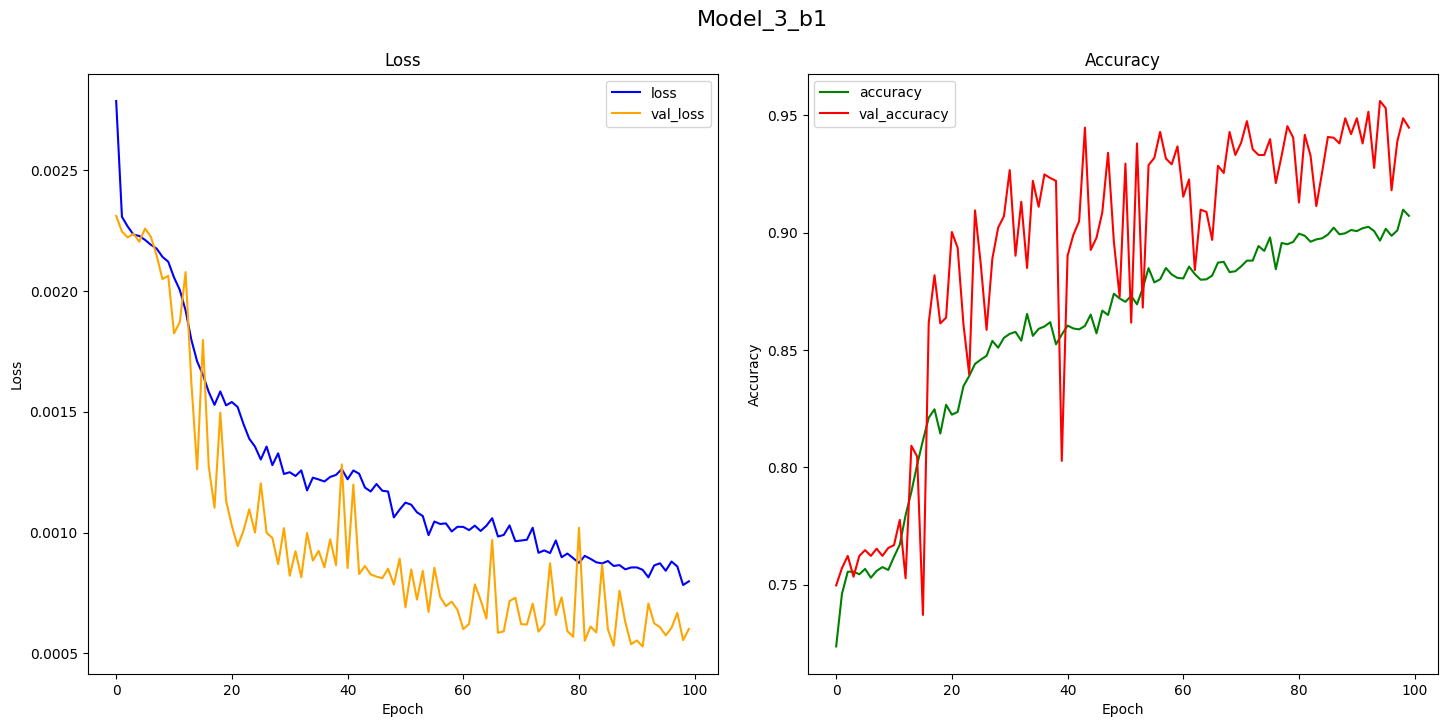

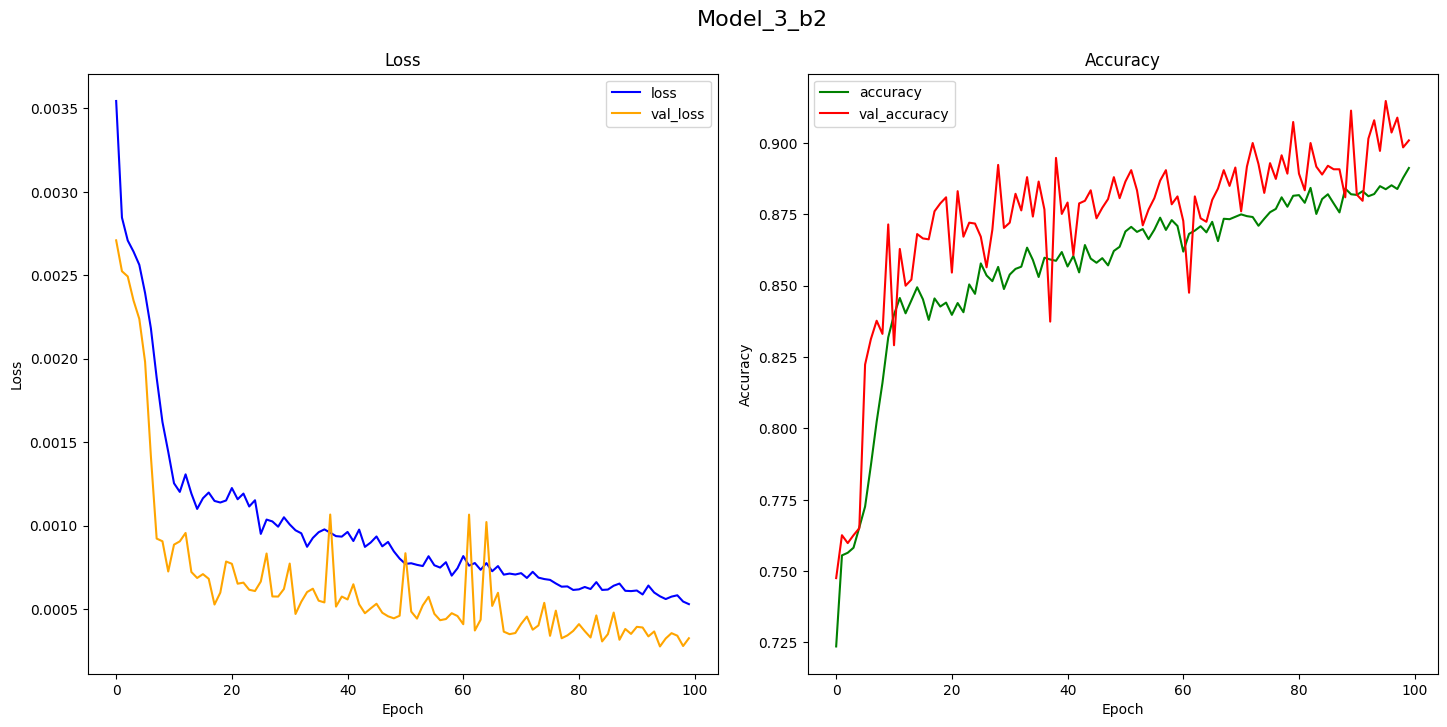

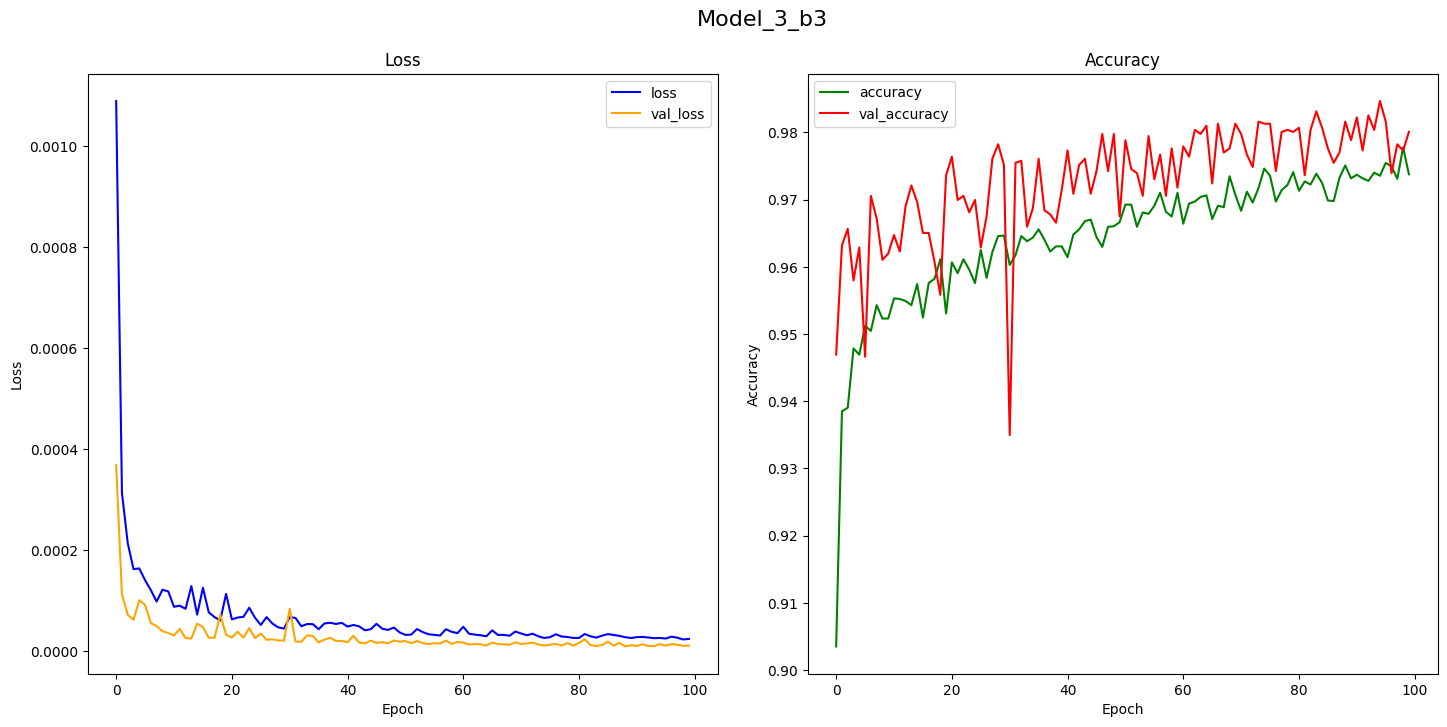

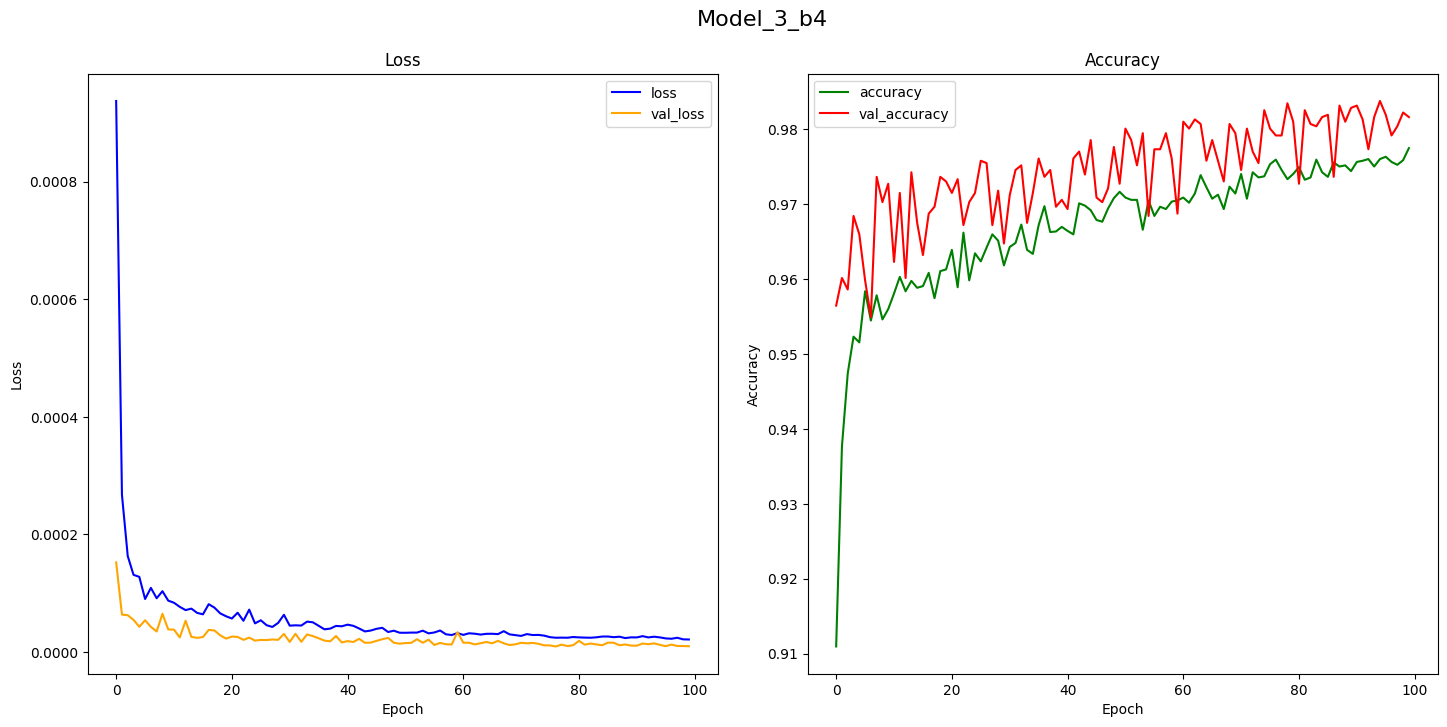

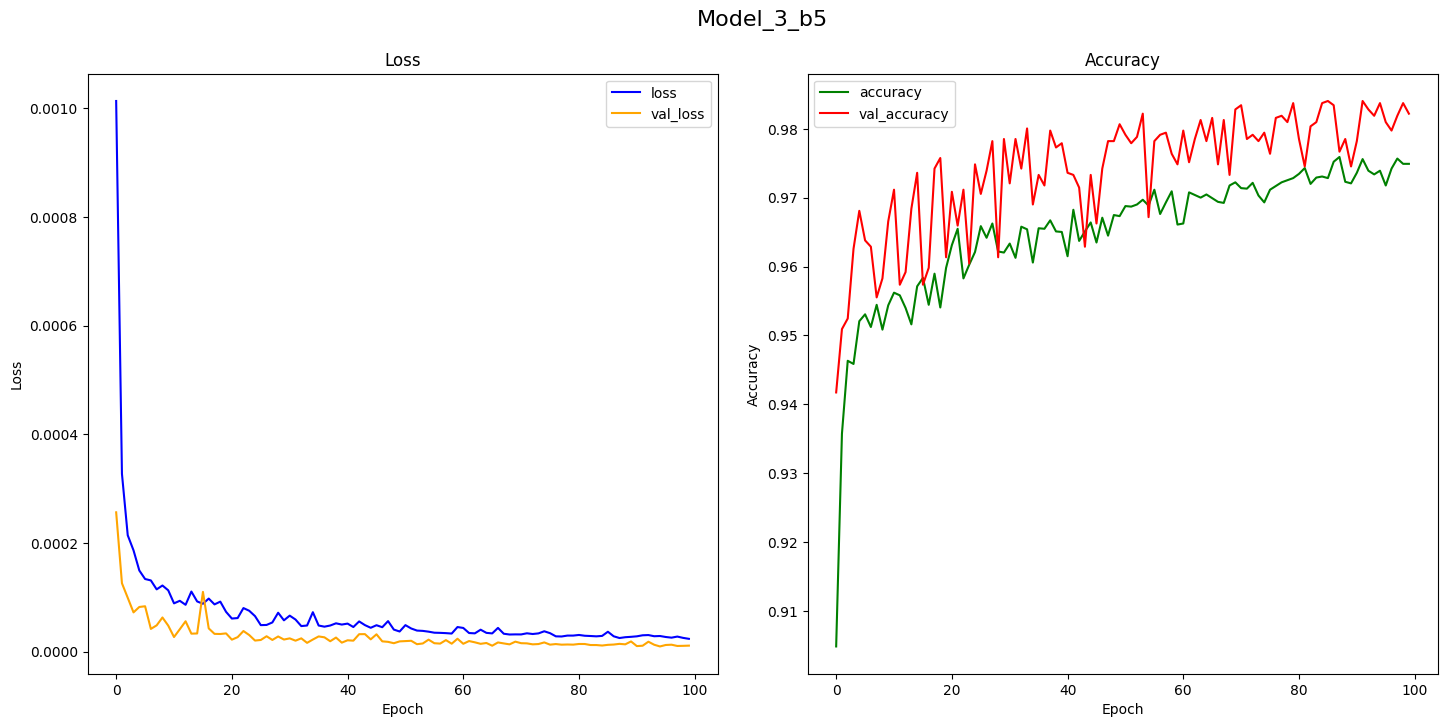

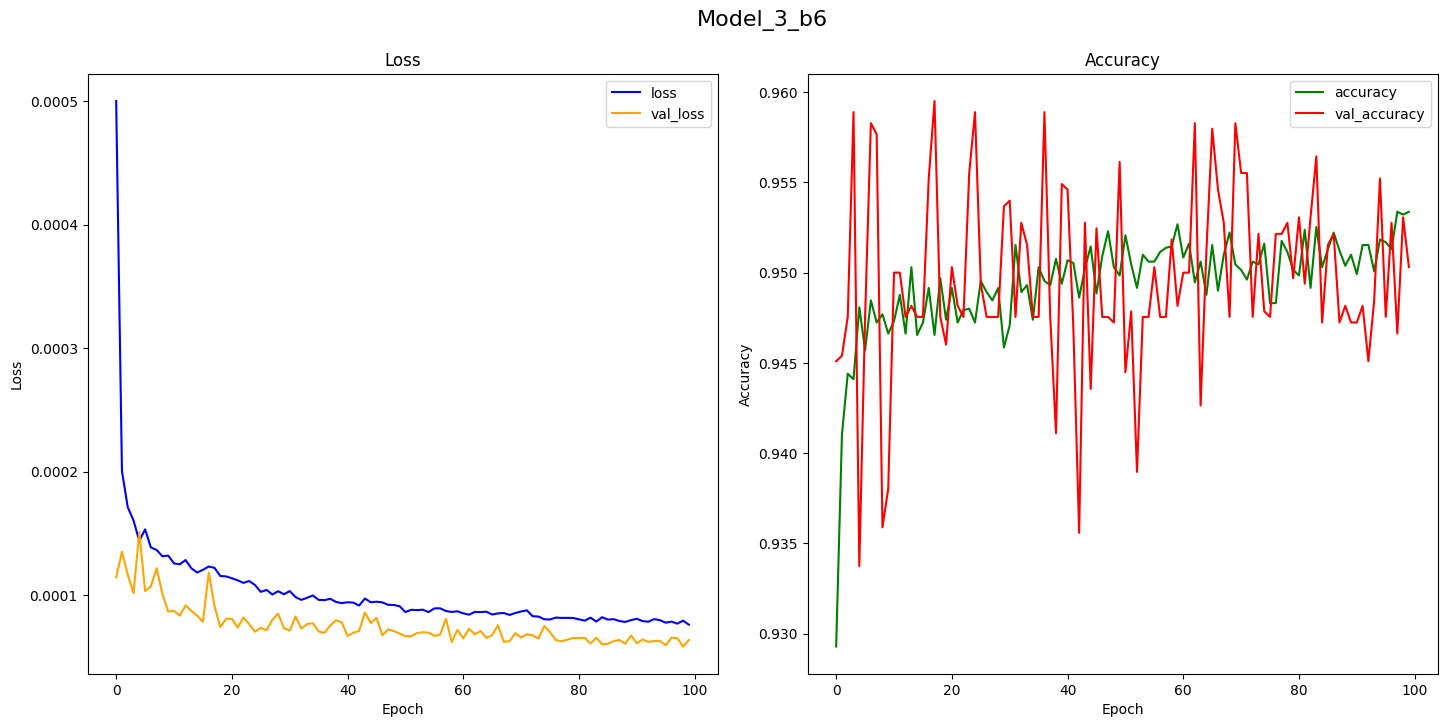

In [46]:
import matplotlib.pyplot as plt

def plot_training_results(all_names, all_histories):
    # Tạo figure với 6 frame riêng biệt (1 cho mỗi mô hình)
    for i, (name, history) in enumerate(zip(all_names, all_histories)):
        # Tạo một frame mới cho mỗi mô hình
        fig = plt.figure(figsize=(15, 8))
        
        # Tạo subplot con bên trái (loss) và bên phải (accuracy)
        ax_loss = fig.add_axes([0.05, 0.15, 0.42, 0.75])   # left, bottom, width, height
        ax_acc  = fig.add_axes([0.53, 0.15, 0.42, 0.75])

        # Plot loss/val_loss
        ax_loss.plot(history['loss'], label='loss', color='blue')
        ax_loss.plot(history['val_loss'], label='val_loss', color='orange')
        ax_loss.set_title('Loss')
        ax_loss.set_xlabel('Epoch')
        ax_loss.set_ylabel('Loss')
        ax_loss.legend()

        # Plot accuracy/val_accuracy
        ax_acc.plot(history['accuracy'], label='accuracy', color='green')
        ax_acc.plot(history['val_accuracy'], label='val_accuracy', color='red')
        ax_acc.set_title('Accuracy')
        ax_acc.set_xlabel('Epoch')
        ax_acc.set_ylabel('Accuracy')
        ax_acc.legend()

        # Tạo tiêu đề cho toàn bộ frame (mô hình)
        fig.suptitle(name, fontsize=16)

        # Hiển thị frame
        plt.show()

# Gọi hàm sau khi đã train xong
plot_training_results(all_names, all_histories)


In [47]:
import matplotlib.pyplot as plt

# Hiển thị các metrics
print("\n📊 Đánh giá mô hình:")
print(f"{'Model':<12} {'RMSE':>8} {'MAE':>8} {'R²':>8} {'MAPE (%)':>12} {'SMAPE (%)':>12}")
print("-" * 64)

for i, (rmse, mae, r2, mape, smape_val) in enumerate(all_metrics):
    print(f"{all_names[i]:<12} {rmse:>8.4f} {mae:>8.4f} {r2:>8.4f} {mape:>12.4f} {smape_val:>12.4f}")



📊 Đánh giá mô hình:
Model            RMSE      MAE       R²     MAPE (%)    SMAPE (%)
----------------------------------------------------------------
Model_3_b1     0.0214   0.0135   0.8675     127.5433      10.3163
Model_3_b2     0.0166   0.0118   0.9320      46.1267      11.4526
Model_3_b3     0.0033   0.0025   0.9976       5.3493       2.3243
Model_3_b4     0.0031   0.0023   0.9979       5.8714       2.3008
Model_3_b5     0.0033   0.0025   0.9976       5.1750       2.9162
Model_3_b6     0.0080   0.0058   0.9864      10.3784       4.0987


📊 So sánh hiệu suất giữa các mô hình ANN:
        Model      RMSE       MAE        R²    MAPE (%)  SMAPE (%)
3  Model_3_b4  0.003107  0.002340  0.997929    5.871392   2.300777
2  Model_3_b3  0.003292  0.002539  0.997608    5.349269   2.324328
4  Model_3_b5  0.003304  0.002526  0.997643    5.175049   2.916199
5  Model_3_b6  0.007962  0.005824  0.986371   10.378355   4.098686
1  Model_3_b2  0.016580  0.011771  0.932045   46.126699  11.452581
0  Model_3_b1  0.021392  0.013486  0.867468  127.543276  10.316281


C:\Users\MINH KHOI\AppData\Local\Temp\ipykernel_11556\2450837015.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x="Model", y="RMSE", palette="Blues_d")


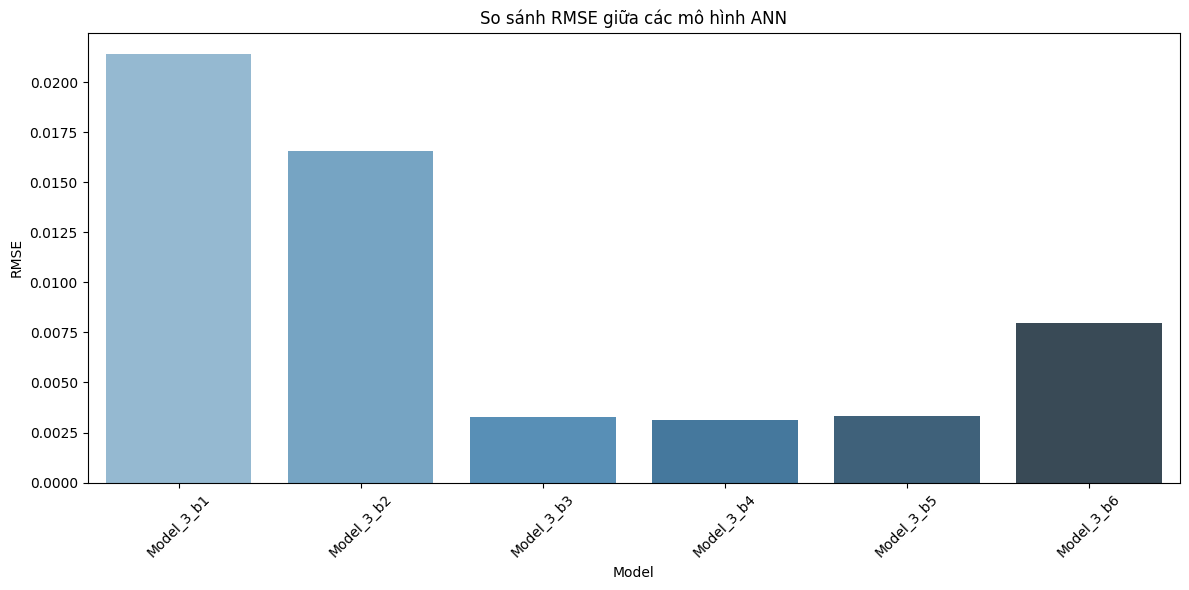

C:\Users\MINH KHOI\AppData\Local\Temp\ipykernel_11556\2450837015.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x="Model", y="MAPE (%)", palette="Oranges_d")


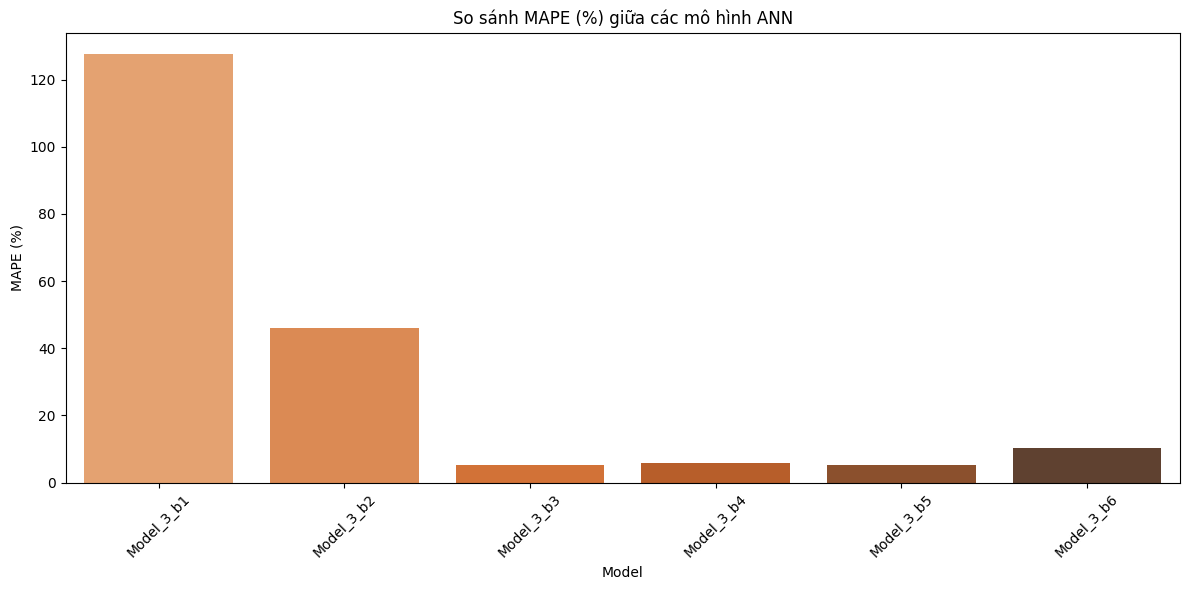

C:\Users\MINH KHOI\AppData\Local\Temp\ipykernel_11556\2450837015.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x="Model", y="SMAPE (%)", palette="Greens_d")


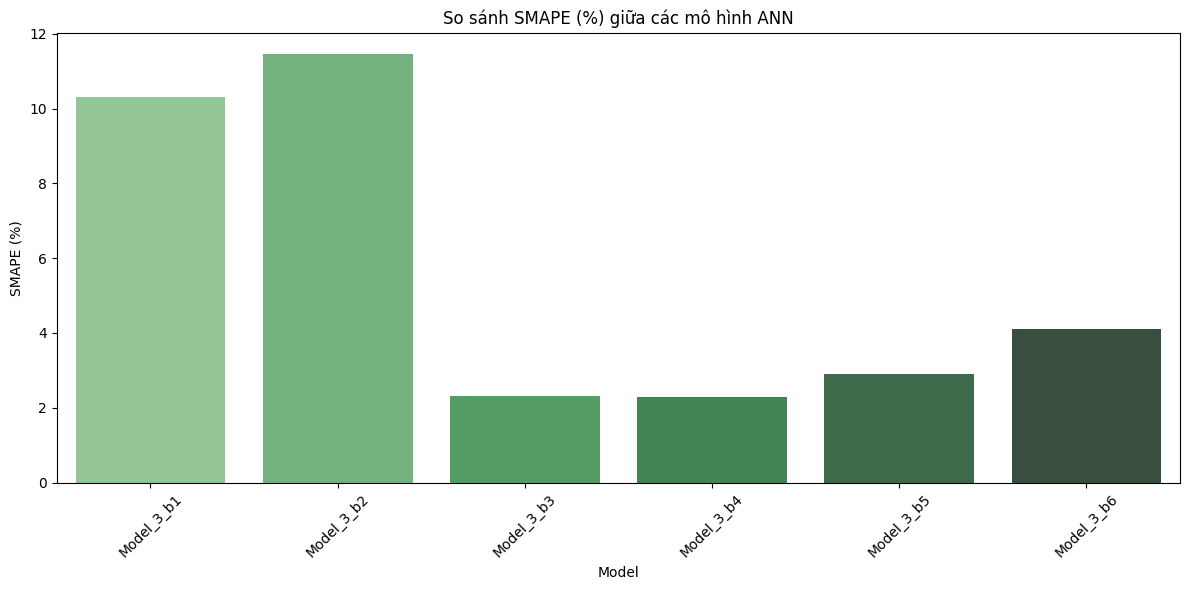

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tách metrics từ all_metrics (RMSE, MAE, R², MAPE, SMAPE)
rmse_list   = [m[0] for m in all_metrics]
mae_list    = [m[1] for m in all_metrics]
r2_list     = [m[2] for m in all_metrics]
mape_list   = [m[3] for m in all_metrics]
smape_list  = [m[4] for m in all_metrics]

# Tạo DataFrame tổng hợp
comparison_df = pd.DataFrame({
    "Model": all_names,
    "RMSE": rmse_list,
    "MAE": mae_list,
    "R²": r2_list,
    "MAPE (%)": mape_list,
    "SMAPE (%)": smape_list
})

# 🔍 Hiển thị bảng kết quả theo RMSE tăng dần
print("📊 So sánh hiệu suất giữa các mô hình ANN:")
print(comparison_df.sort_values(by="RMSE"))

# 📈 Vẽ biểu đồ RMSE
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x="Model", y="RMSE", palette="Blues_d")
plt.title("So sánh RMSE giữa các mô hình ANN")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📈 Vẽ biểu đồ MAPE
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x="Model", y="MAPE (%)", palette="Oranges_d")
plt.title("So sánh MAPE (%) giữa các mô hình ANN")
plt.ylabel("MAPE (%)")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📈 Vẽ biểu đồ SMAPE
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x="Model", y="SMAPE (%)", palette="Greens_d")
plt.title("So sánh SMAPE (%) giữa các mô hình ANN")
plt.ylabel("SMAPE (%)")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
